## Credit Card Fraud Detection

The objective of this project is to predict fraudulent credit card transactions with the help of machine learning models. We will be analysing the customer level data 

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

 

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

In [2]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# import machine learning sklearn libraries
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, average_precision_score, precision_recall_curve, roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip "/content/drive/MyDrive/Colab Notebooks/creditcard.csv.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/creditcard.csv.zip
  inflating: creditcard.csv          
  inflating: __MACOSX/._creditcard.csv  


In [5]:
# Import credit card transaction data

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Observe the different feature types present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [6]:
# Dropping duplicate rows if any
df.drop_duplicates(inplace=True)

# Dropping rows with all NaN values
print (df.shape)
df.dropna(axis=0, how='all', inplace=True)
print (df.shape)

(283726, 31)
(283726, 31)


In [7]:
# Check for missing values in Class column

print (f'Missing values : {df["Class"].isna().sum()}')

Missing values : 0


In [8]:
# Checking for null values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Checking the distribution of fraud/non-fraud transactions

print (f'Non fraudulent transactions = {df [df["Class"] == 0].shape[0]}')
print (f'Fraudulent transactions = {df [df["Class"] == 1].shape[0]}')

Non fraudulent transactions = 283253
Fraudulent transactions = 473


In [10]:
print (f'Non fraudulent transactions percentage : {(df [df["Class"] == 0].shape[0] / df.shape[0]) * 100} %')
print (f'Fraudulent transactions percentage : {(df [df["Class"] == 1].shape[0] / df.shape[0]) * 100} %')

Non fraudulent transactions percentage : 99.83328986416473 %
Fraudulent transactions percentage : 0.1667101358352777 %


In [11]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

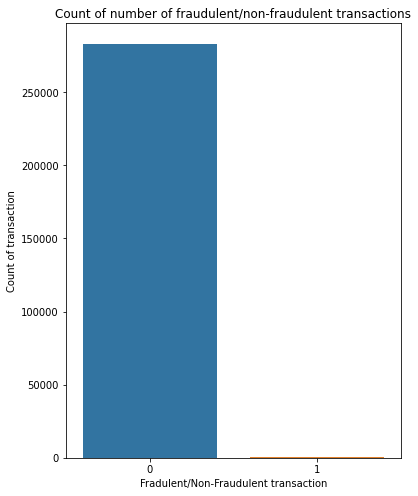

In [12]:
# Create a bar plot for the number of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(6,8))
ax = sns.countplot(data=df, x="Class")
plt.xlabel("Fradulent/Non-Fraudulent transaction")
plt.ylabel("Count of transaction")
plt.title("Count of number of fraudulent/non-fraudulent transactions")
plt.show()

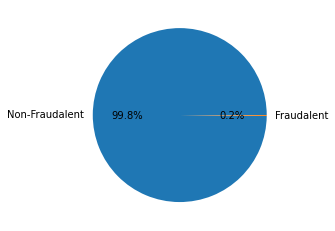

In [13]:
# Create Pie chart for fraudulent / non-fraudulent transactions

classes = df['Class'].value_counts()

# Non fraudulent counts
normal_share = classes[0]/df['Class'].count() * 100

# Fraudulent counts
fraud_share = classes[1]/df['Class'].count() * 100

labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

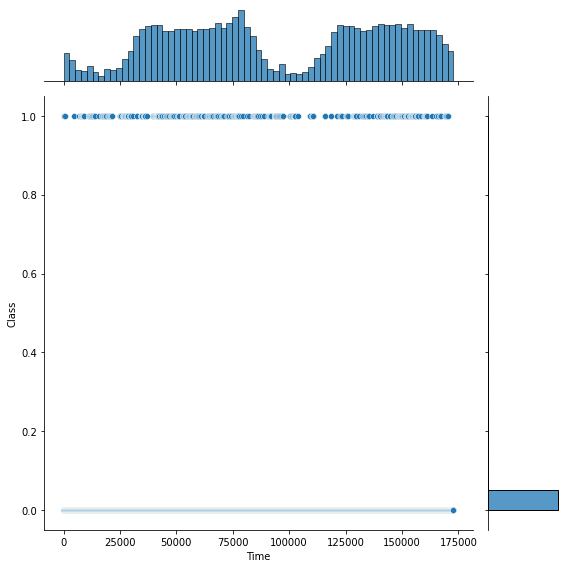

In [14]:
# Create a scatter plot to observe the distribution of classes with time

sns.jointplot(data=df, x="Time", y="Class", height=8, kind="scatter")
plt.xlabel("Time")
plt.ylabel("Class")
plt.show()

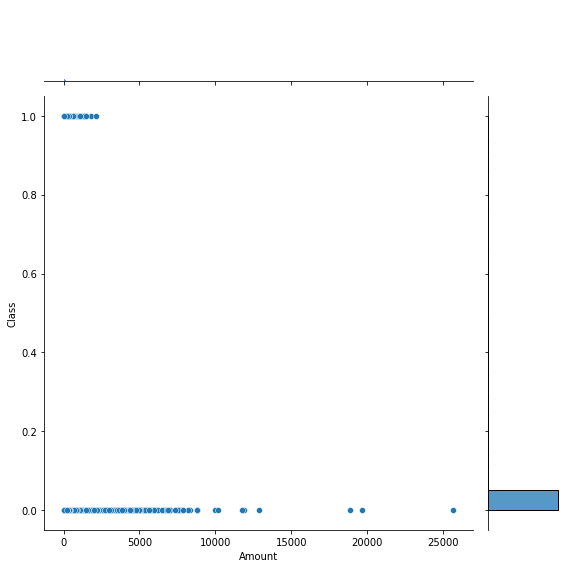

In [15]:
# Create a scatter plot to observe the distribution of classes with Amount

sns.jointplot(data=df, x="Amount", y="Class", kind="scatter", height=8)
plt.xlabel("Amount")
plt.ylabel("Class")
plt.show()

### We have 492 fraudalent transactions out of 284807 total credit card transactions.

Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example. To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc.

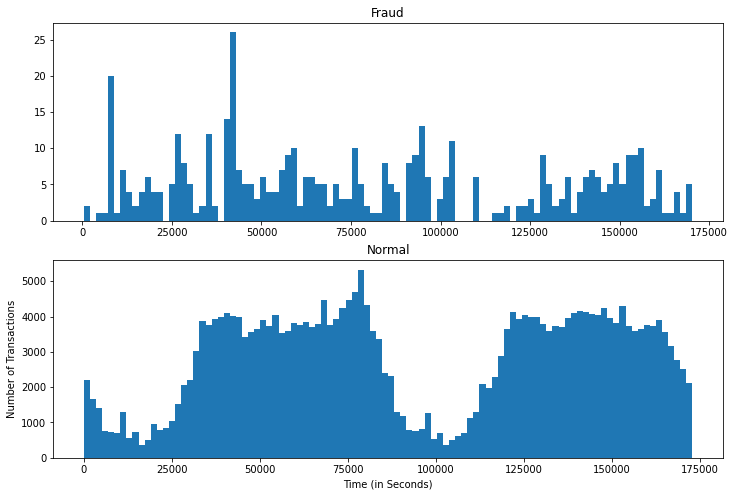

In [16]:
# Plotting the normal and fraud transaction distribution over time

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

bins = 100

# Histogram for Fraud data
ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

# Histogram for Normal data
ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

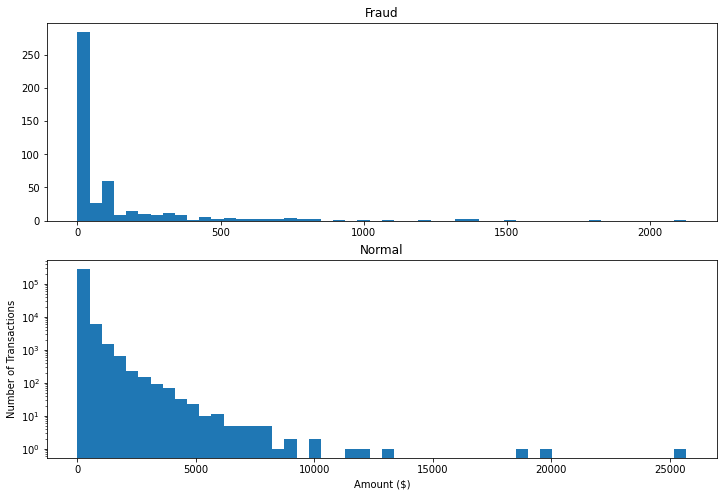

In [17]:
# Plotting the distribution of Amount for both type of transactions
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

bins = 50

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [18]:
# Print correlated features with target variable

df_corr = df.corr()['Class']
df_corr.sort_values(ascending=False).head(6)

Class    1.000000
V11      0.149067
V4       0.129326
V2       0.084624
V19      0.033631
V8       0.033068
Name: Class, dtype: float64

#### Top 5 highly correlated features are V11, V4, V2, V19, V8

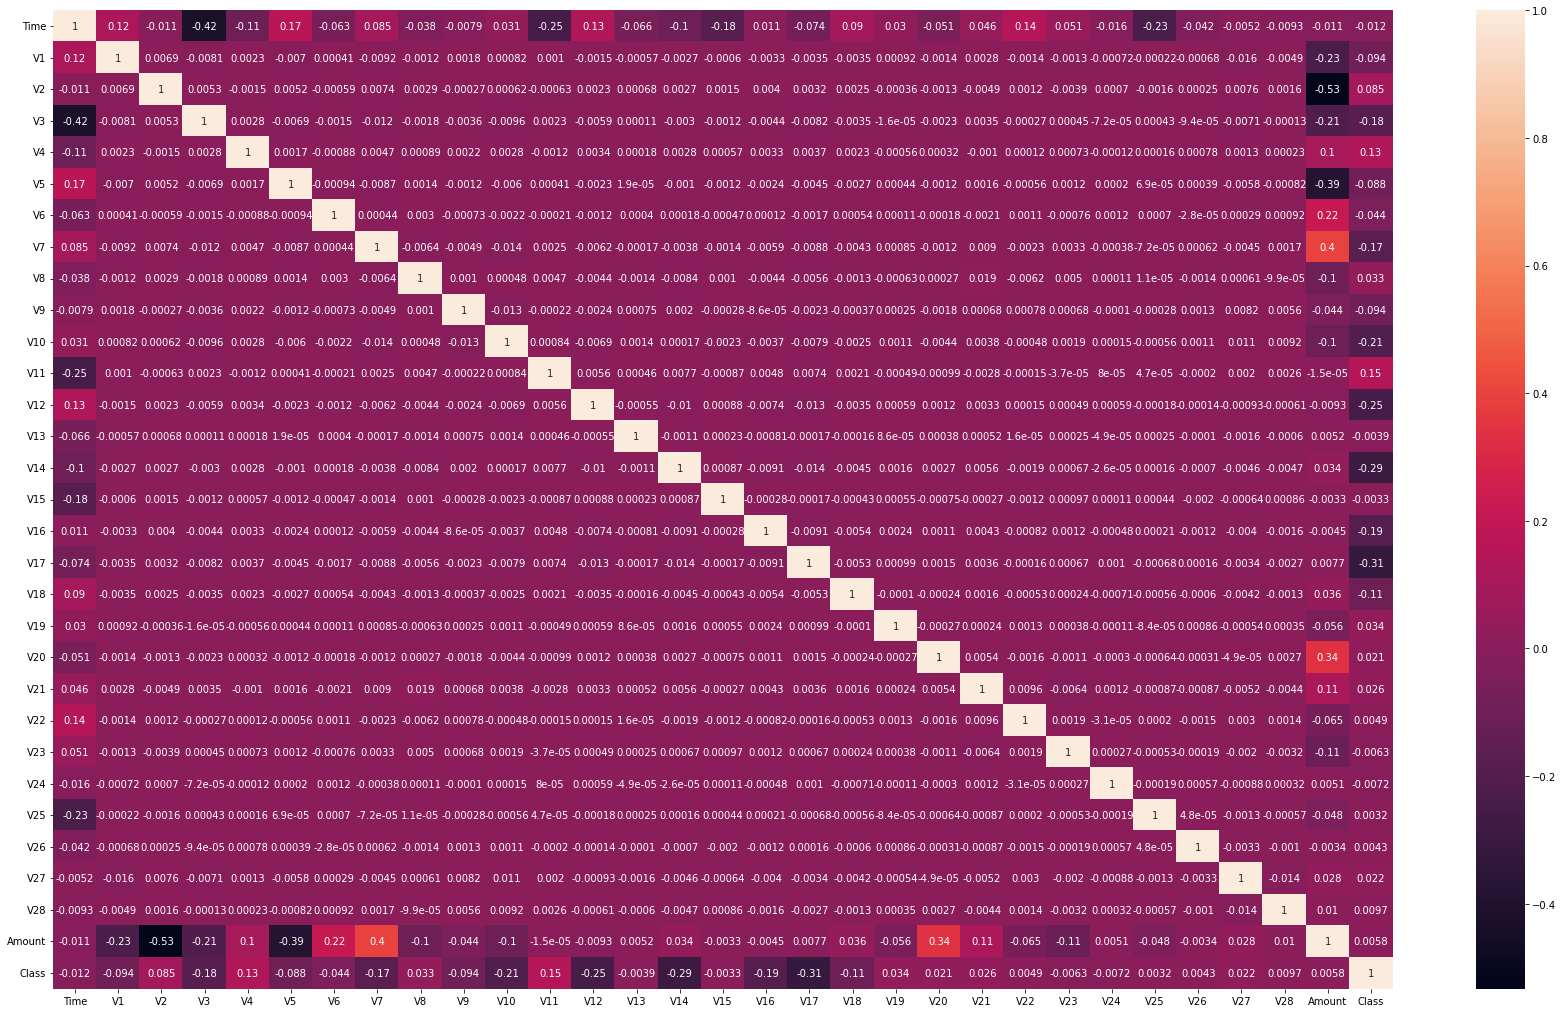

In [19]:
# Plotting heatmap

plt.figure(figsize=(30,18))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
# Drop unnecessary columns
# Drop Time columns as this is not a time series problem

df = df.drop(columns=['Time'], axis=1)

### Splitting the data into train & test data

In [8]:
# Assigning X and y

y = df['Class']
X = df.drop(columns = ['Class'], axis=1)

In [9]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [23]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

473
360
113


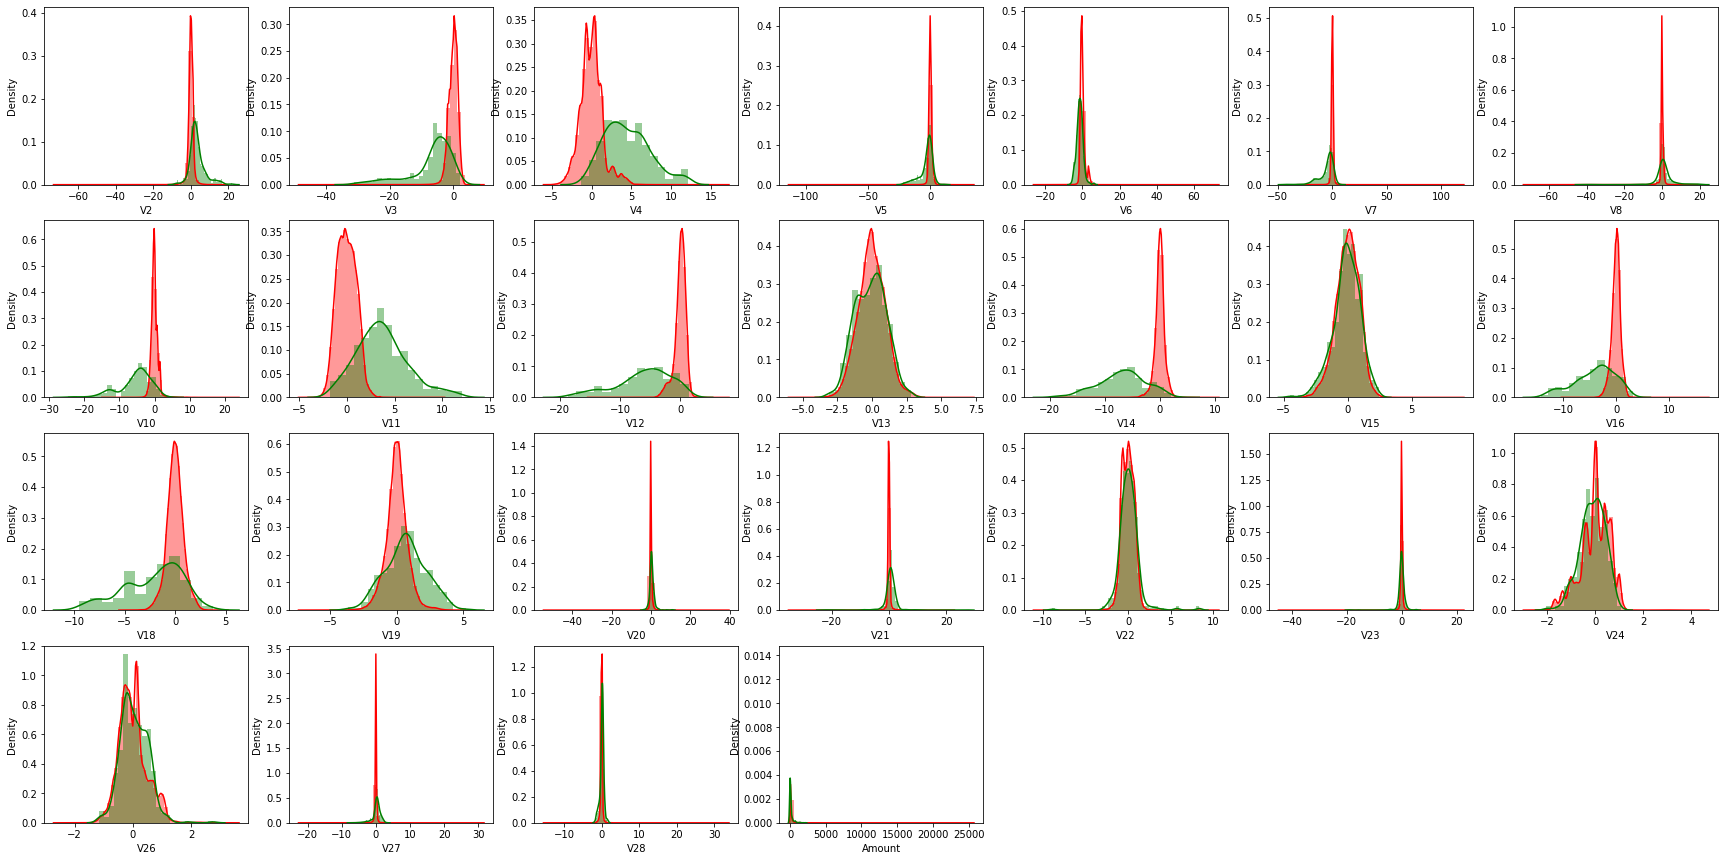

In [24]:
# Checking the skewness of independent features
plt.figure(figsize=(30,15))

normal_records = df.Class == 0
fraud_records = df.Class == 1

cols_list1 = X.columns[1:8]
cols_list2 = X.columns[9:16]
cols_list3 = X.columns[17:24]
cols_list4 = X.columns[25:29]

i=1

for col in cols_list1:
    plt.subplot(4, 7, i)
    sns.distplot(X[col][normal_records], color="red")
    sns.distplot(X[col][fraud_records], color="green")
    i+=1

for col in cols_list2:
    plt.subplot(4, 7, i)
    sns.distplot(X[col][normal_records], color="red")
    sns.distplot(X[col][fraud_records], color="green")
    i+=1

for col in cols_list3:
    plt.subplot(4, 7, i)
    sns.distplot(X[col][normal_records], color="red")
    sns.distplot(X[col][fraud_records], color="green")
    i+=1

for col in cols_list4:
    plt.subplot(4, 7, i)
    sns.distplot(X[col][normal_records], color="red")
    sns.distplot(X[col][fraud_records], color="green")
    i+=1
    
plt.show()

In [25]:
# Creating a result dataframe
df_Results = pd.DataFrame(columns = ['Data Imbalance Handling Method','Model','Accuracy','ROC Value','Threshold'])

In [26]:
# Confusion Matrix plot

def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [27]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for L2 regularisation")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for L1 regularisation")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  # Predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  # Predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with L2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("******* Classification Report ********")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with L1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("Classification Report")
  print(classification_report(y_test, y_pred_l1))

  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data Imbalance Handling Method': DataImabalance, 'Model': 'Logistic Regression with L2 Regularisation', 'Accuracy': Accuracy_l2, 'ROC Value': l2_roc_value, 'Threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data Imbalance Handling Method': DataImabalance, 'Model': 'Logistic Regression with L1 Regularisation', 'Accuracy': Accuracy_l1, 'ROC Value': l1_roc_value, 'Threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [28]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data Imbalance Handling Method': DataImabalance, 'Model': 'KNN', 'Accuracy': score, 'ROC Value': knn_roc_value, 'Threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [29]:
def buildAndRunTreeModels(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()

      df_Results = df_Results.append(pd.DataFrame({'Data Imbalance Handling Method': DataImbalance, 'Model': 'Tree Model with {0} criteria'.format(c), 'Accuracy': test_score, 'ROC Value': tree_roc_value, 'Threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [30]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data Imbalance Handling Method': DataImabalance, 'Model': 'Random Forest', 'Accuracy': RF_test_score, 'ROC Value': roc_value, 'Threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [31]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data Imbalance Handling Method': DataImabalance, 'Model': 'XGBoost', 'Accuracy': XGB_test_score, 'ROC Value': XGB_roc_value, 'Threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [11]:
# Getting all the columns 
cols = X.columns.values
print (cols)

['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25'
 'V26' 'V27' 'V28' 'Amount']


In [33]:
# Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [34]:
# Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt, columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt, columns=cols)

In [35]:
X_train_pt_df.columns.values

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype=object)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9820316220748598
Max auc_roc for l1: 0.9842583192382504
Parameters for L2 regularisation
[[-0.15308734 -0.0330143  -0.27507971  0.54490894  0.04325525 -0.00470981
  -0.07201955 -0.20929651 -0.18210608 -0.20243927  0.17451576 -0.45752775
  -0.10046707 -0.59712859 -0.03980993 -0.17214659 -0.02376015  0.02744842
  -0.08596994 -0.03059572  0.09113288  0.14550273 -0.04576395  0.0224842
   0.00528654  0.00672516 -0.06568399 -0.02109493  0.04513446]]
[-8.01573205]
{1: array([[0.98524635, 0.98524635, 0.98524635, 0.98524635, 0.98524773,
        0.98525876, 0.99680413, 0.99735286, 0.99655596, 0.99612029,
        0.99573425, 0.99573425, 0.99573425, 0.99573425, 0.99573425,
        0.99573425, 0.99573425, 0.99573425, 0.99573425, 0.99573425],
       [0.89711631, 0.89711631, 0.89711631, 0.89711631, 0.89711631,
        0.89711631, 0.95310363, 0.99006514, 0.99451241, 0.99579181,
        0.99579181, 0.99579181, 0.99579181, 0.9957918

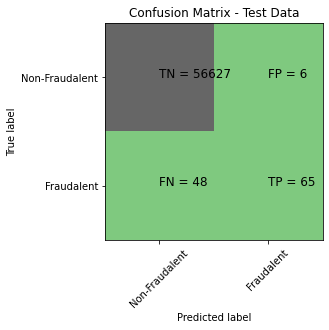

******* Classification Report ********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.92      0.58      0.71       113

    accuracy                           1.00     56746
   macro avg       0.96      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746

Accuarcy of Logistic model with L1 regularisation : 0.9989779015260988
Confusion Matrix


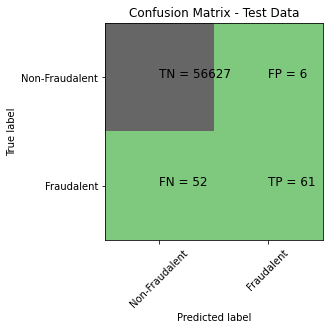

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.91      0.54      0.68       113

    accuracy                           1.00     56746
   macro avg       0.95      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746

l2 roc_value: 0.9809981328313382
l2 threshold: 0.0020004402385574017
ROC for the test dataset 98.1%


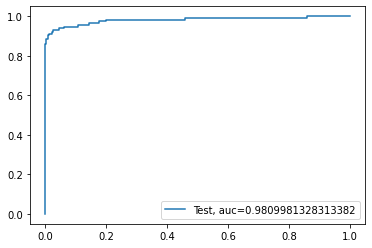

l1 roc_value: 0.9799400862157199
l1 threshold: 0.005365005882502897
ROC for the test dataset 98.0%


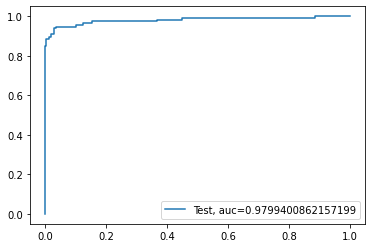

Time Taken by Model: --- 206.1952784061432 seconds ---
--------------------------------------------------------------------------------


In [38]:
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "Power Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988545448137314
Confusion Matrix


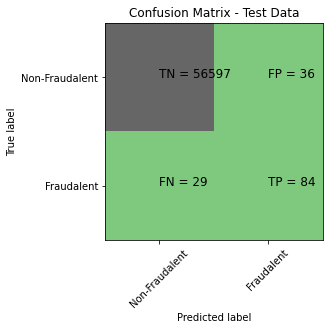

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.70      0.74      0.72       113

    accuracy                           1.00     56746
   macro avg       0.85      0.87      0.86     56746
weighted avg       1.00      1.00      1.00     56746

gini tree_roc_value: 0.8713635800384685
Tree threshold: 1.0
ROC for the test dataset 87.1%


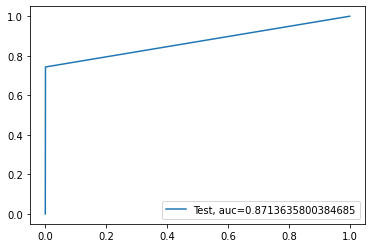

entropy score: 0.9991893701758714
Confusion Matrix


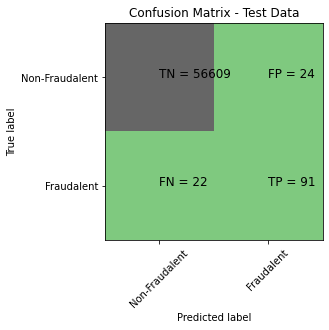

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.79      0.81      0.80       113

    accuracy                           1.00     56746
   macro avg       0.90      0.90      0.90     56746
weighted avg       1.00      1.00      1.00     56746

entropy tree_roc_value: 0.9024429766628138
Tree threshold: 1.0
ROC for the test dataset 90.2%


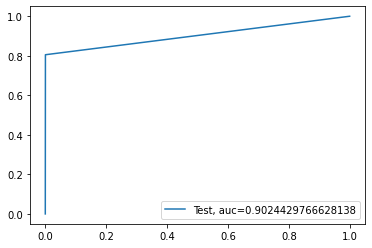

Time Taken by Model: --- 39.66877293586731 seconds ---
--------------------------------------------------------------------------------


In [39]:
# Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df, y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9995418179254926
Confusion Matrix


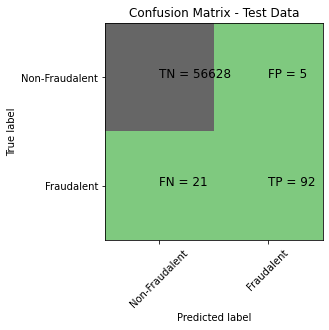

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.95      0.81      0.88       113

    accuracy                           1.00     56746
   macro avg       0.97      0.91      0.94     56746
weighted avg       1.00      1.00      1.00     56746

Random Forest roc_value: 0.9676417592607206
Random Forest threshold: 0.01
ROC for the test dataset 96.8%


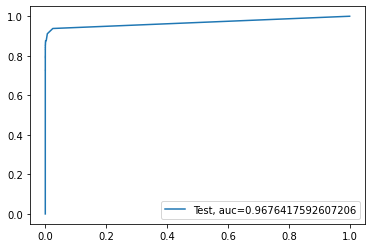

Time Taken by Model: --- 322.09859895706177 seconds ---
--------------------------------------------------------------------------------


In [40]:
# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9995594403129736
Confusion Matrix


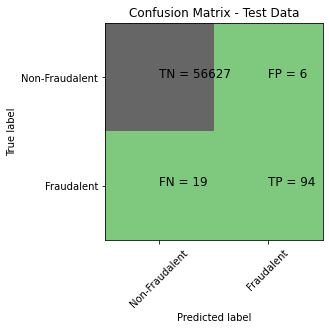

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.94      0.83      0.88       113

    accuracy                           1.00     56746
   macro avg       0.97      0.92      0.94     56746
weighted avg       1.00      1.00      1.00     56746

XGboost roc_value: 0.9695336953703937
XGBoost threshold: 0.002104848623275757
ROC for the test dataset 97.0%


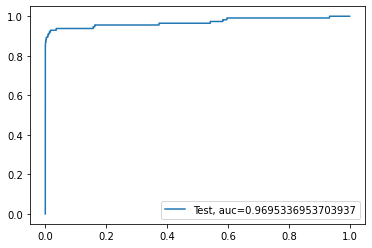

Time Taken by Model: --- 64.15934538841248 seconds ---
--------------------------------------------------------------------------------


In [41]:
# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [42]:
df_Results.head()

,Data Imbalance Handling Method,Model,Accuracy,ROC Value,Threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999048,0.980998,0.002000
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998978,0.979940,0.005365
2,Power Transformer,Tree Model with gini criteria,0.998855,0.871364,1.000000
3,Power Transformer,Tree Model with entropy criteria,0.999189,0.902443,1.000000
4,Power Transformer,Random Forest,0.999542,0.967642,0.010000


### Perform cross validation with StratifiedKFold

In [43]:
# Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30191  30261  30275 ... 283723 283724 283725] TEST: [    0     1     2 ... 56805 56806 56807]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [ 30191  30261  30275 ... 113535 113536 113537]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [ 77084  77379  79220 ... 170292 170293 170294]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [149302 150027 150068 ... 226999 227000 227001]
TRAIN: [     0      1      2 ... 226999 227000 227001] TEST: [212341 212365 213905 ... 283723 283724 283725]


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9823067597030739
Max auc_roc for l1: 0.9671743524493996
Parameters for L2 regularisation
[[ 0.00714987  0.06373519 -0.06773899  0.22032903  0.05467122 -0.03079829
  -0.02238045 -0.11537321 -0.0706747  -0.16776029  0.12644426 -0.19171837
  -0.03975734 -0.36330258  0.00324775 -0.09124461 -0.07163273 -0.00337152
   0.00255925 -0.02954407  0.03961419  0.02680935 -0.01204065 -0.01058693
  -0.00693658  0.00726365 -0.01099044 -0.00209791  0.00041285]]
[-7.45452439]
{1: array([[0.60054334, 0.60163885, 0.61496647, 0.73325601, 0.90303061,
        0.97547905, 0.99037744, 0.99253694, 0.99264157, 0.99031945,
        0.99031945, 0.99031945, 0.99031945, 0.99031945, 0.99031945,
        0.99031945, 0.99031945, 0.99031945, 0.99031945, 0.99031945],
       [0.61334433, 0.61473269, 0.63129936, 0.76302474, 0.92076238,
        0.95430794, 0.96025848, 0.96020747, 0.9642609 , 0.96247684,
        0.96247684, 0.96247684, 0.96247684, 0.962476

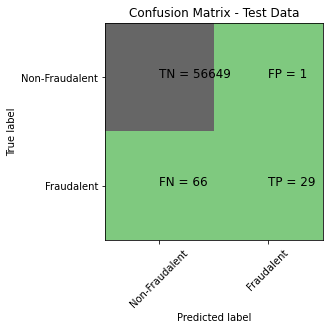

******* Classification Report ********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.97      0.31      0.46        95

    accuracy                           1.00     56745
   macro avg       0.98      0.65      0.73     56745
weighted avg       1.00      1.00      1.00     56745

Accuarcy of Logistic model with L1 regularisation : 0.9988897700237906
Confusion Matrix


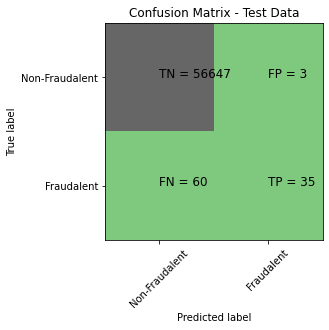

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.92      0.37      0.53        95

    accuracy                           1.00     56745
   macro avg       0.96      0.68      0.76     56745
weighted avg       1.00      1.00      1.00     56745

l2 roc_value: 0.9827622985088493
l2 threshold: 0.0015236307920493096
ROC for the test dataset 98.3%


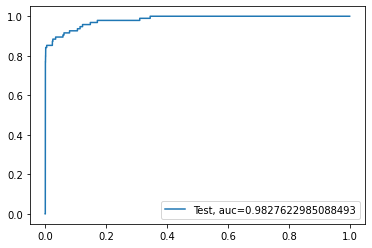

l1 roc_value: 0.935477493380406
l1 threshold: 0.012035587426837111
ROC for the test dataset 93.5%


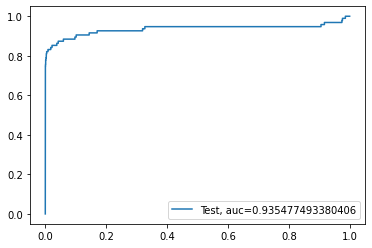

Time Taken by Model: --- 507.13816928863525 seconds ---
--------------------------------------------------------------------------------


In [44]:
# Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

**As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**

Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [45]:
  # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

# searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9849267438432724
Parameters for l2 regularisations
[[ 1.05446224e-03  4.54544055e-02 -8.96349797e-02  2.37221820e-01
   9.53490289e-02 -5.45302629e-02 -2.92564042e-02 -1.14563116e-01
  -9.22713629e-02 -1.68617294e-01  1.36086676e-01 -1.96656051e-01
  -4.12393173e-02 -3.65621656e-01  1.66224173e-03 -8.96688592e-02
  -8.00529143e-02 -5.74631778e-03 -2.60880847e-03 -1.41760919e-02
   3.64500237e-02  2.99684329e-02 -6.31306641e-03 -8.28547765e-03
  -1.18663643e-02  4.72422693e-03 -1.33125194e-02  3.71239367e-03
   3.52620835e-04]]
[-7.47044631]
{1: array([[0.59418843, 0.5956678 , 0.61561094, 0.77069179, 0.93841409,
        0.98414475, 0.99581284, 0.99678621, 0.9962554 , 0.9949925 ,
        0.99419284, 0.99419284, 0.99419284, 0.99419284, 0.99419284,
        0.99419284, 0.99419284, 0.99419284, 0.99419284, 0.99419284],
       [0.55365552, 0.55494772, 0.5745499 , 0.74408441, 0.92963196,
        0.98105388, 0.99411394, 0.99396593, 0.99458784, 0.9948867 ,
        0.9948867 

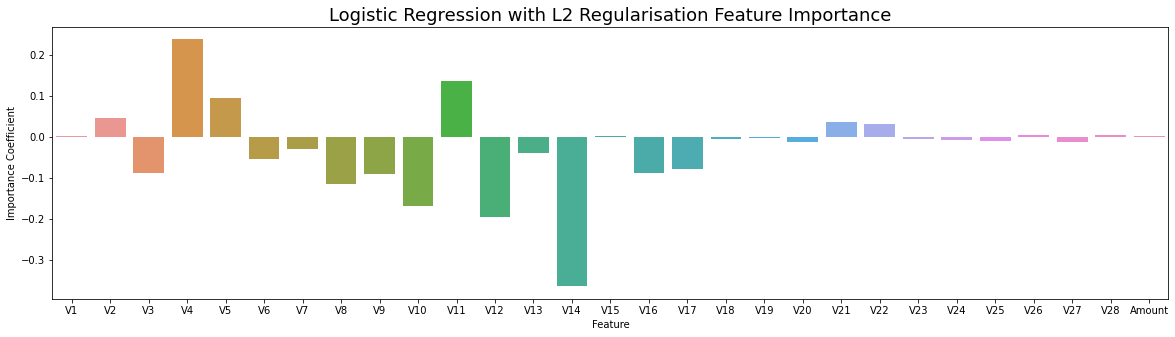

In [46]:
# Plotting feature importances of logistic regression coefficients

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

**Its is evident that V4, V11, v5 has + ve imporatnce whereas V14, V12, V10 seems to have -ve impact on the predictaions**

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988192792316504
Confusion Matrix


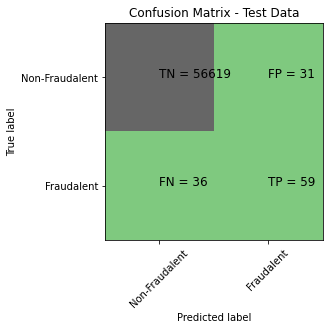

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.66      0.62      0.64        95

    accuracy                           1.00     56745
   macro avg       0.83      0.81      0.82     56745
weighted avg       1.00      1.00      1.00     56745

gini tree_roc_value: 0.8102527059042134
Tree threshold: 1.0
ROC for the test dataset 81.0%


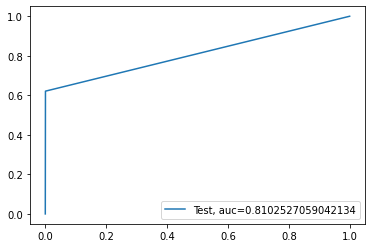

entropy score: 0.9991893558903868
Confusion Matrix


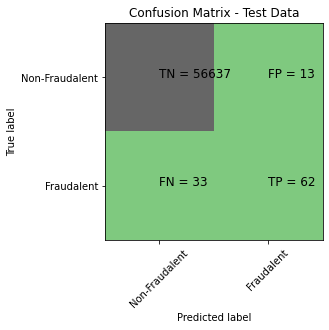

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.83      0.65      0.73        95

    accuracy                           1.00     56745
   macro avg       0.91      0.83      0.86     56745
weighted avg       1.00      1.00      1.00     56745

entropy tree_roc_value: 0.8262010498443815
Tree threshold: 1.0
ROC for the test dataset 82.6%


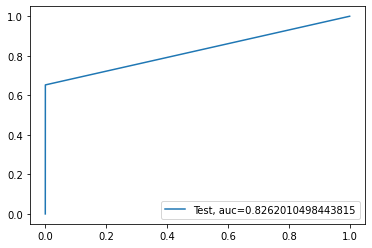

Time Taken by Model: --- 41.241300106048584 seconds ---
--------------------------------------------------------------------------------


In [47]:
# Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9994360736628778
Confusion Matrix


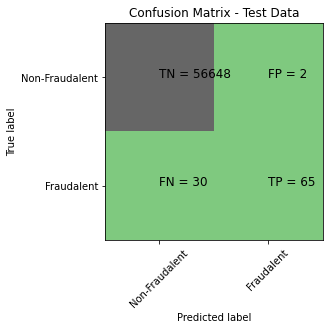

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.97      0.68      0.80        95

    accuracy                           1.00     56745
   macro avg       0.98      0.84      0.90     56745
weighted avg       1.00      1.00      1.00     56745

Random Forest roc_value: 0.9294039113671204
Random Forest threshold: 0.01
ROC for the test dataset 92.9%


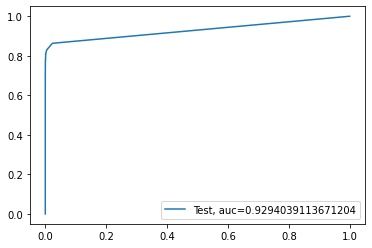

Time Taken by Model: --- 239.9610207080841 seconds ---
--------------------------------------------------------------------------------


In [48]:
# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9993832055687726
Confusion Matrix


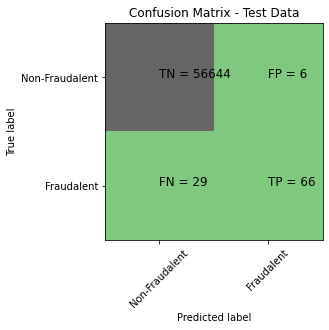

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.92      0.69      0.79        95

    accuracy                           1.00     56745
   macro avg       0.96      0.85      0.90     56745
weighted avg       1.00      1.00      1.00     56745

XGboost roc_value: 0.9788375528406188
XGBoost threshold: 0.0017299040919169784
ROC for the test dataset 97.9%


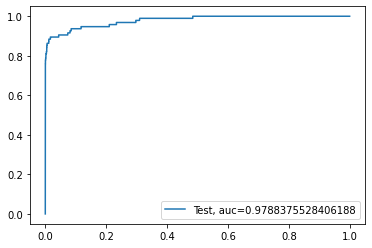

Time Taken by Model: --- 61.96995306015015 seconds ---
--------------------------------------------------------------------------------


In [49]:
# Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [50]:
df_Results

,Data Imbalance Handling Method,Model,Accuracy,ROC Value,Threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999048,0.980998,0.002000
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998978,0.979940,0.005365
2,Power Transformer,Tree Model with gini criteria,0.998855,0.871364,1.000000
3,Power Transformer,Tree Model with entropy criteria,0.999189,0.902443,1.000000
4,Power Transformer,Random Forest,0.999542,0.967642,0.010000
5,Power Transformer,XGBoost,0.999559,0.969534,0.002105
6,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998819,0.982762,0.001524
7,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998890,0.935477,0.012036
8,StratifiedKFold Cross Validation,Tree Model with gini criteria,0.998819,0.810253,1.000000
9,StratifiedKFold Cross Validation,Tree Model with entropy criteria,0.999189,0.826201,1.000000


### Model building with balancing Classes
Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

In [12]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index] 
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)
  
# Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over, columns=cols)

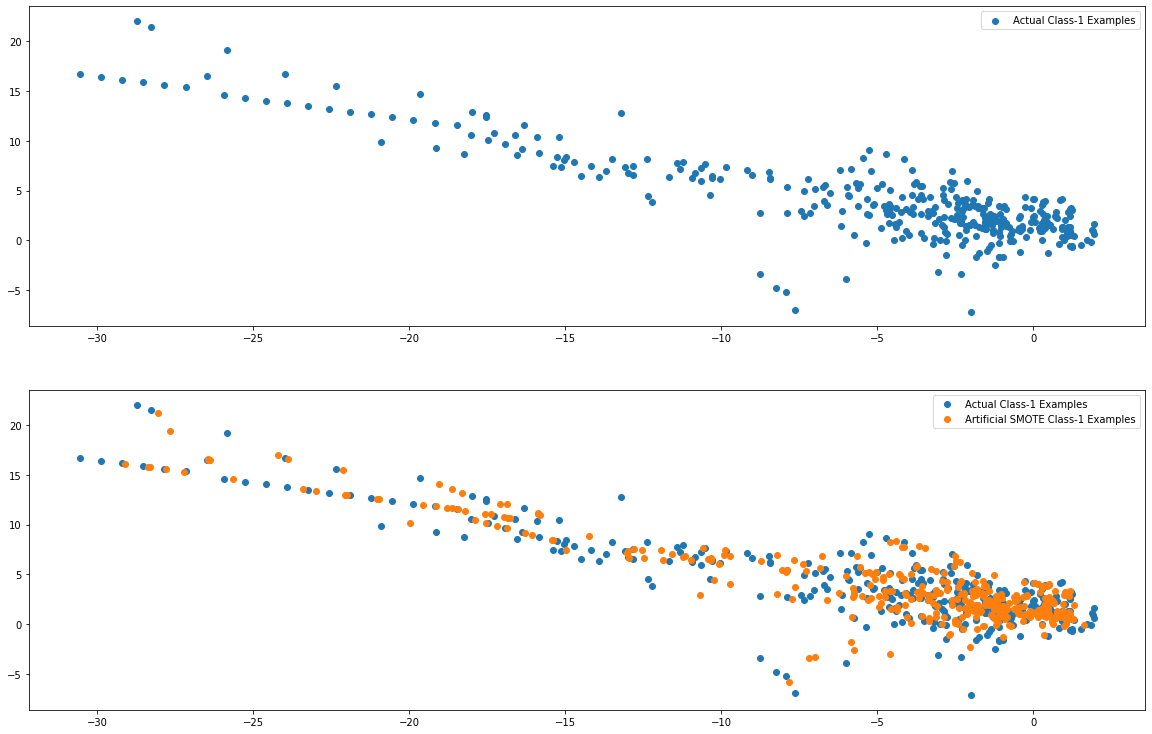

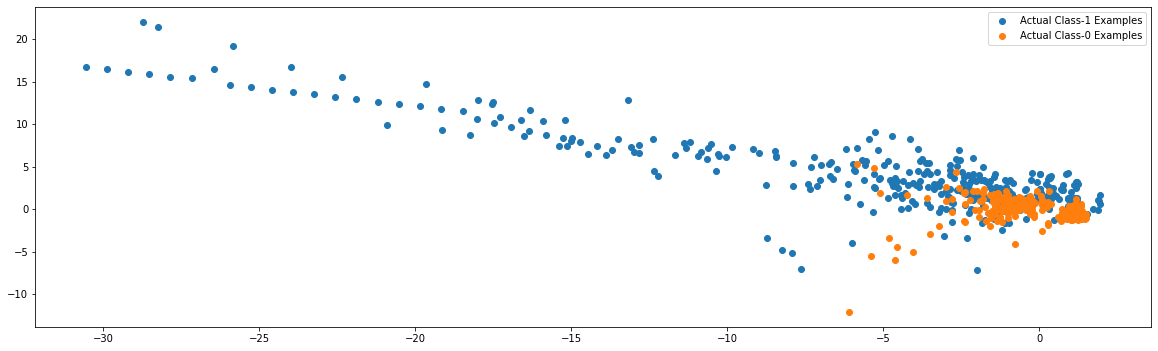

In [52]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()
plt.show()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()


# Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote, columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9924844825289936
Max auc_roc for l1: 0.5
Parameters for L2 regularisation
[[ 0.83430568  0.71834608  0.65859433  0.95078789  0.63252184 -0.74467233
  -0.77796926 -0.47791553 -0.4930445  -1.0576166   0.68026643 -1.26927158
  -0.26447283 -1.51117013  0.10911861 -0.7824318  -0.93454107 -0.481327
   0.22762591 -1.15968927  0.00239408  0.60622376  0.42966778 -0.8169347
   0.51684053  0.11686036 -0.3409192   0.86434795  0.0094437 ]]
[-5.10937586]
{1: array([[0.6230004 , 0.75988944, 0.91323665, 0.96882365, 0.98632867,
        0.98993796, 0.99079132, 0.9916192 , 0.99196046, 0.99205469,
        0.99207034, 0.99207034, 0.99207034, 0.99207034, 0.99207034,
        0.99207034, 0.99207034, 0.99207034, 0.99207034, 0.99207034],
       [0.62324553, 0.76085531, 0.91454405, 0.96954204, 0.98685163,
        0.99019562, 0.99097624, 0.99177766, 0.99209668, 0.99217685,
        0.9921896 , 0.9921896 , 0.9921896 , 0.9921896 , 0.9921896 ,
  

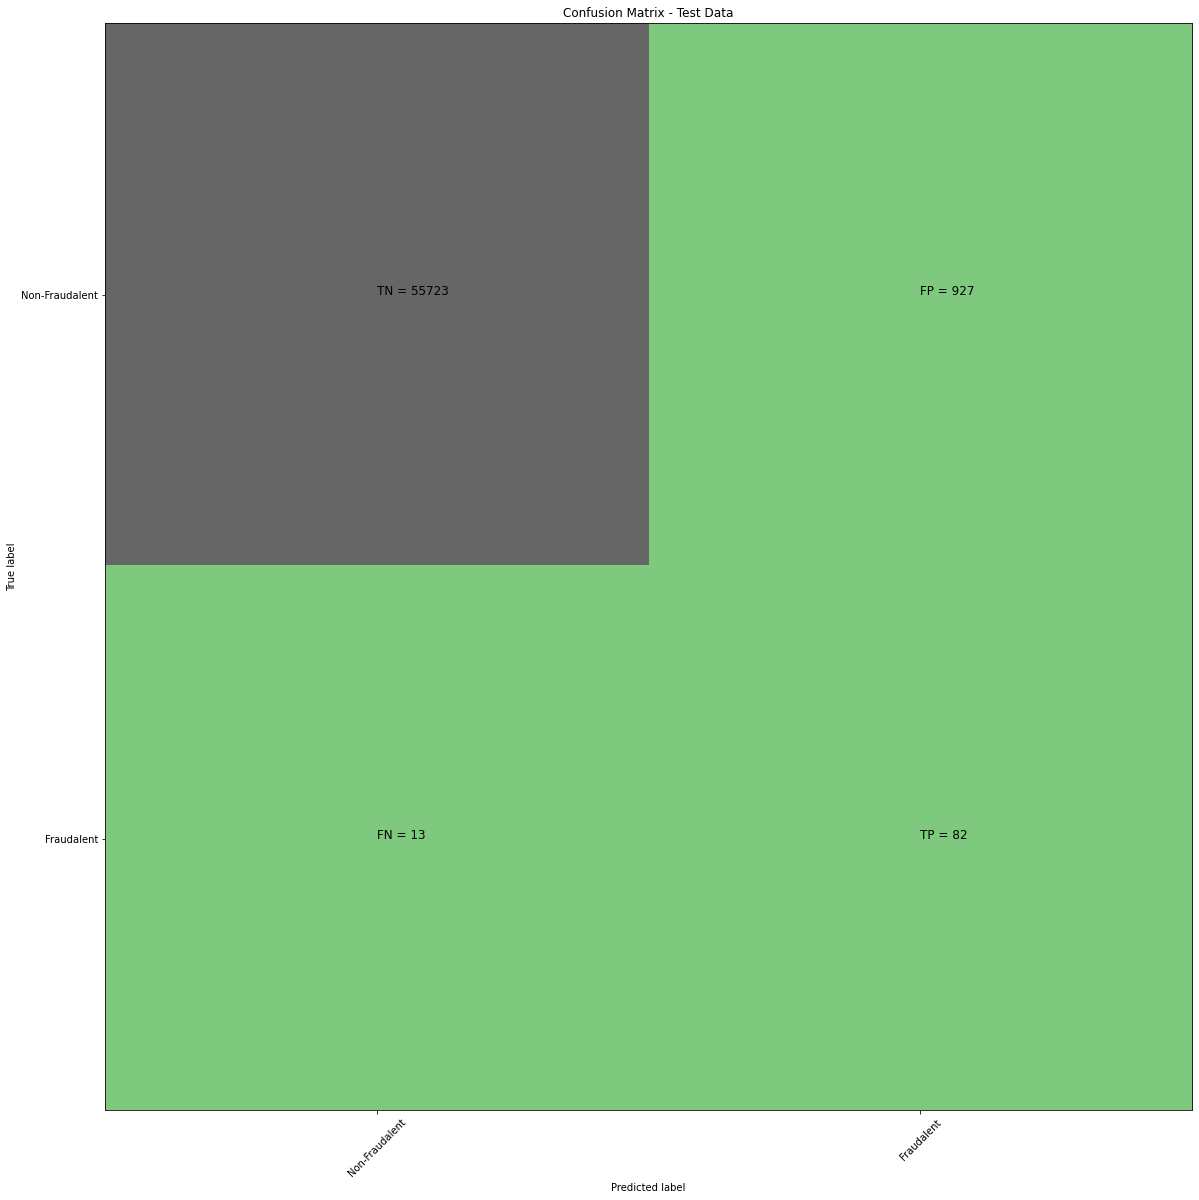

******* Classification Report ********
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56650
           1       0.08      0.86      0.15        95

    accuracy                           0.98     56745
   macro avg       0.54      0.92      0.57     56745
weighted avg       1.00      0.98      0.99     56745

Accuarcy of Logistic model with L1 regularisation : 0.9983258436866684
Confusion Matrix


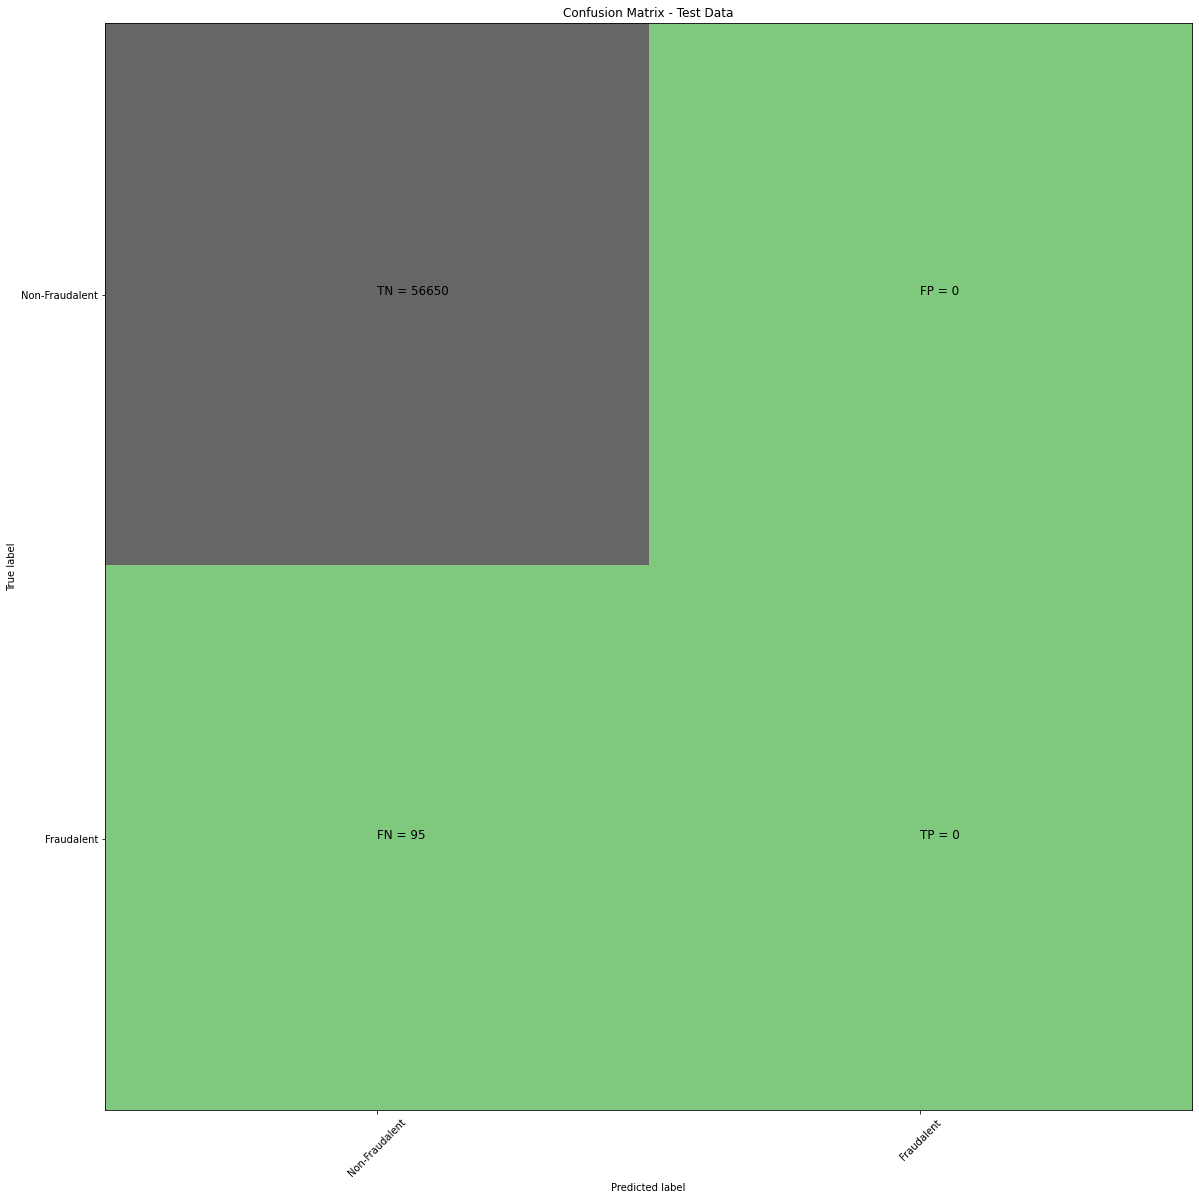

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56745
   macro avg       0.50      0.50      0.50     56745
weighted avg       1.00      1.00      1.00     56745

l2 roc_value: 0.9751433084034004
l2 threshold: 0.39242199751477763
ROC for the test dataset 97.5%


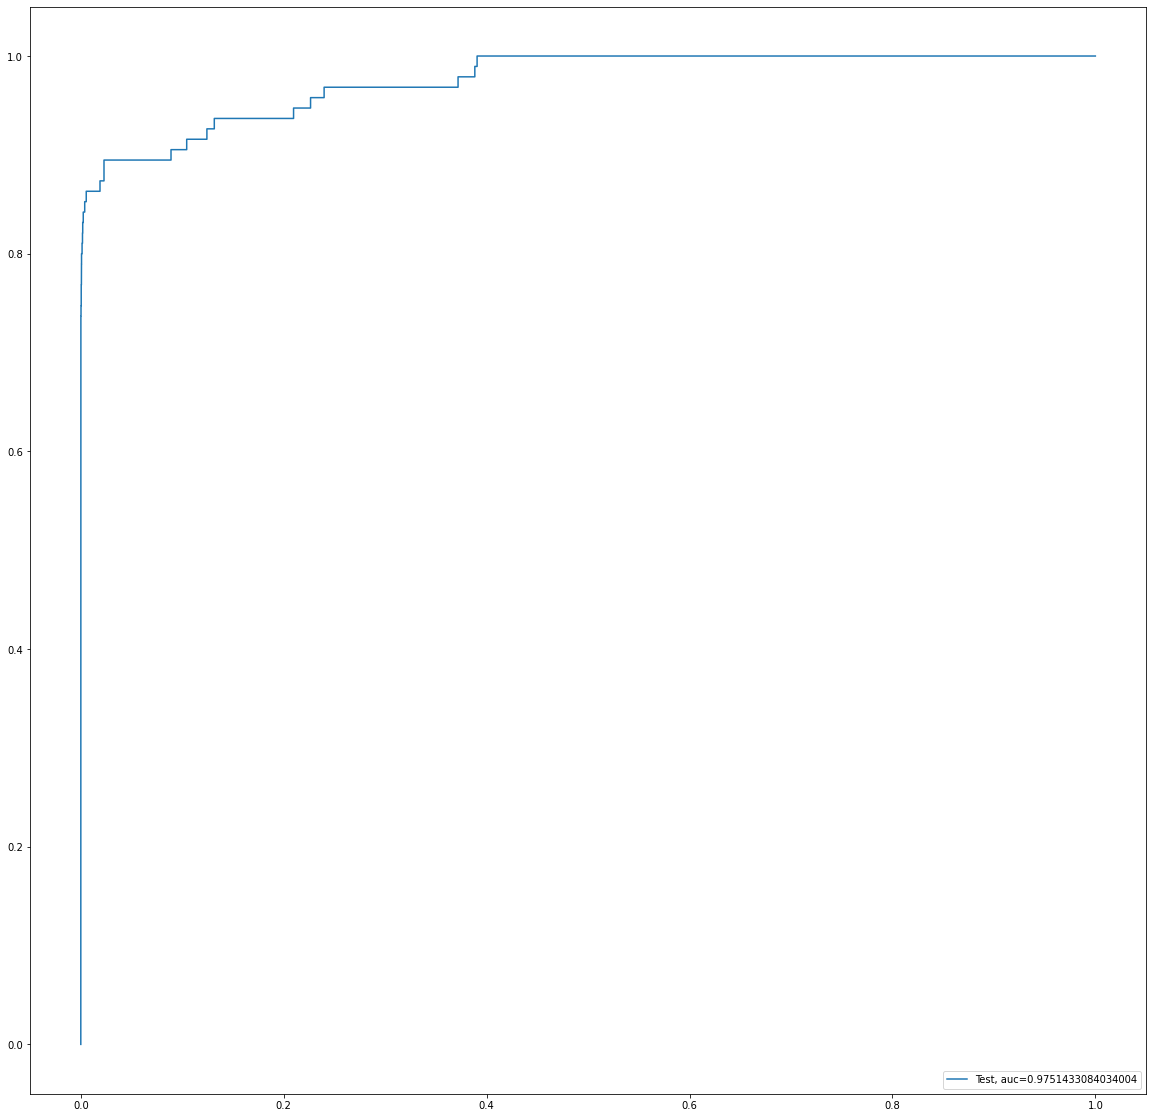

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


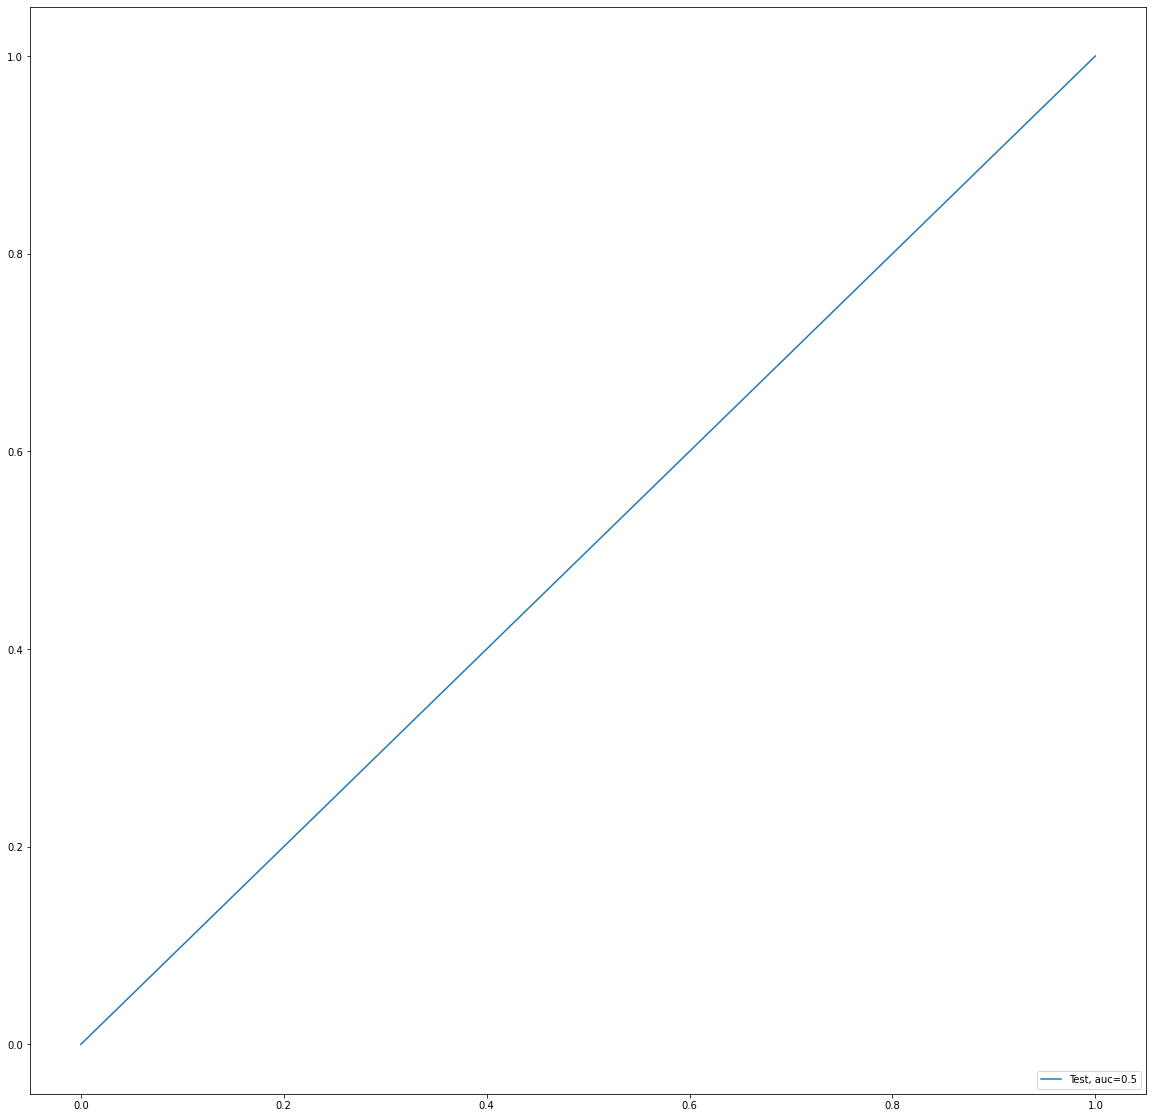

Time Taken by Model: --- 593.756637096405 seconds ---
--------------------------------------------------------------------------------


In [53]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
model score
0.9962463653185303
Confusion Matrix


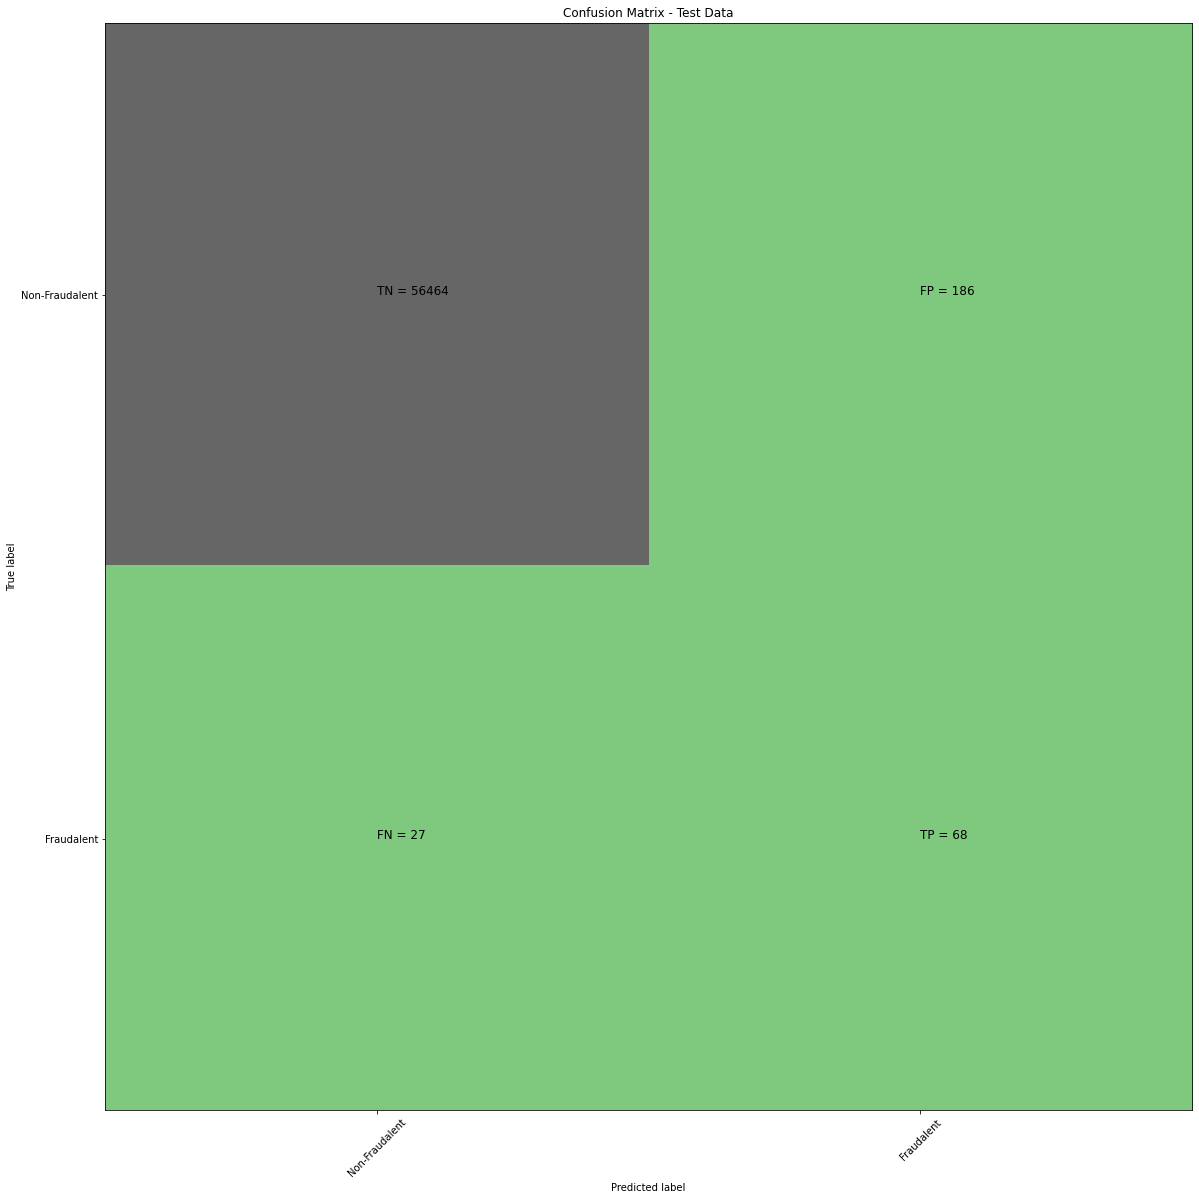

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.27      0.72      0.39        95

    accuracy                           1.00     56745
   macro avg       0.63      0.86      0.69     56745
weighted avg       1.00      1.00      1.00     56745

KNN roc_value: 0.867197472940958
KNN threshold: 0.2
ROC for the test dataset 86.7%


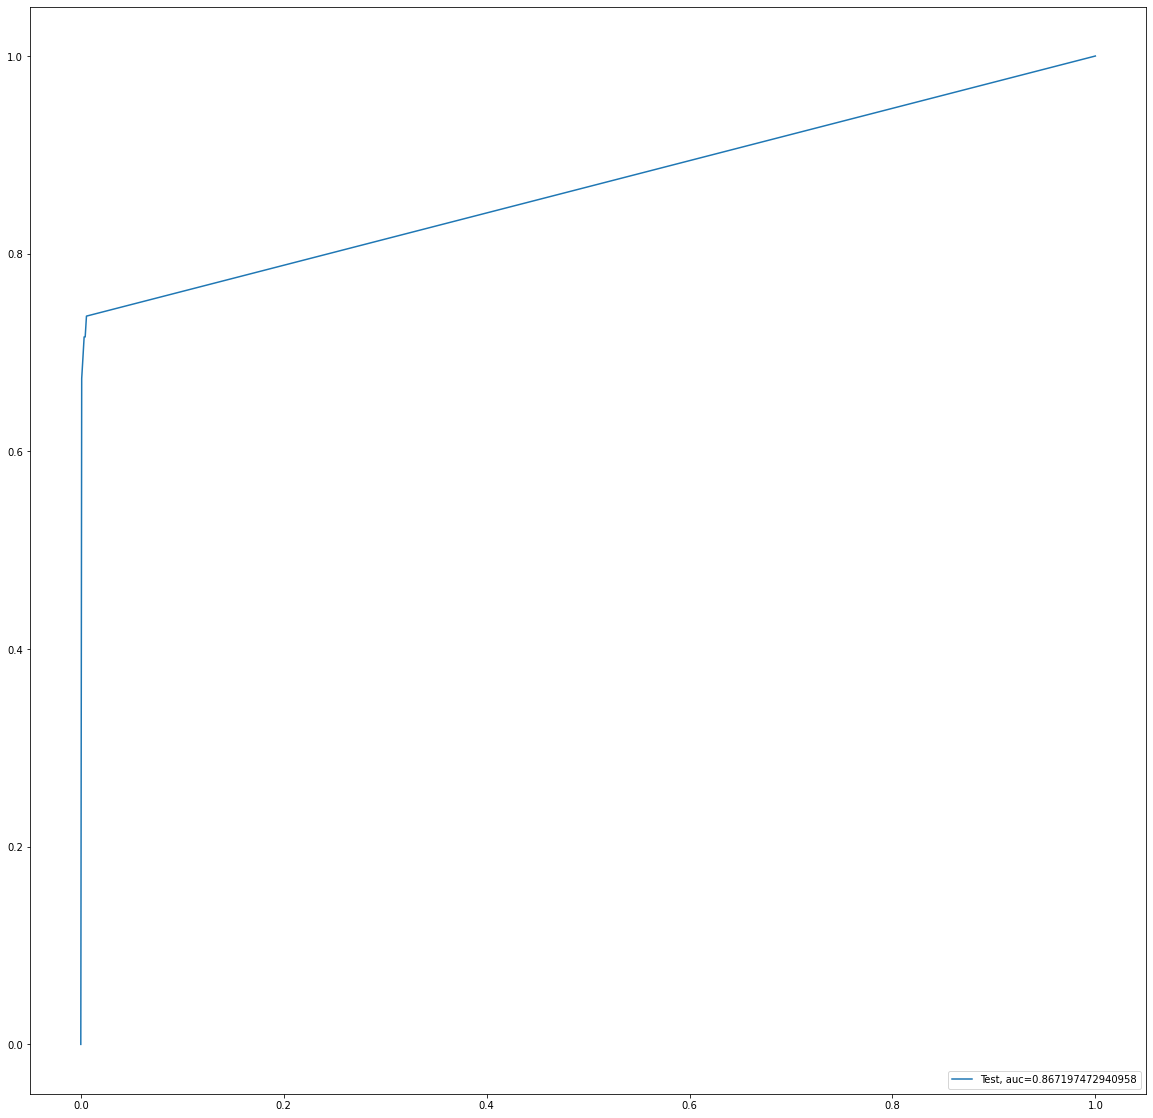

Time Taken by Model: --- 2984.3088488578796 seconds ---
--------------------------------------------------------------------------------


In [54]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9978147854436514
Confusion Matrix


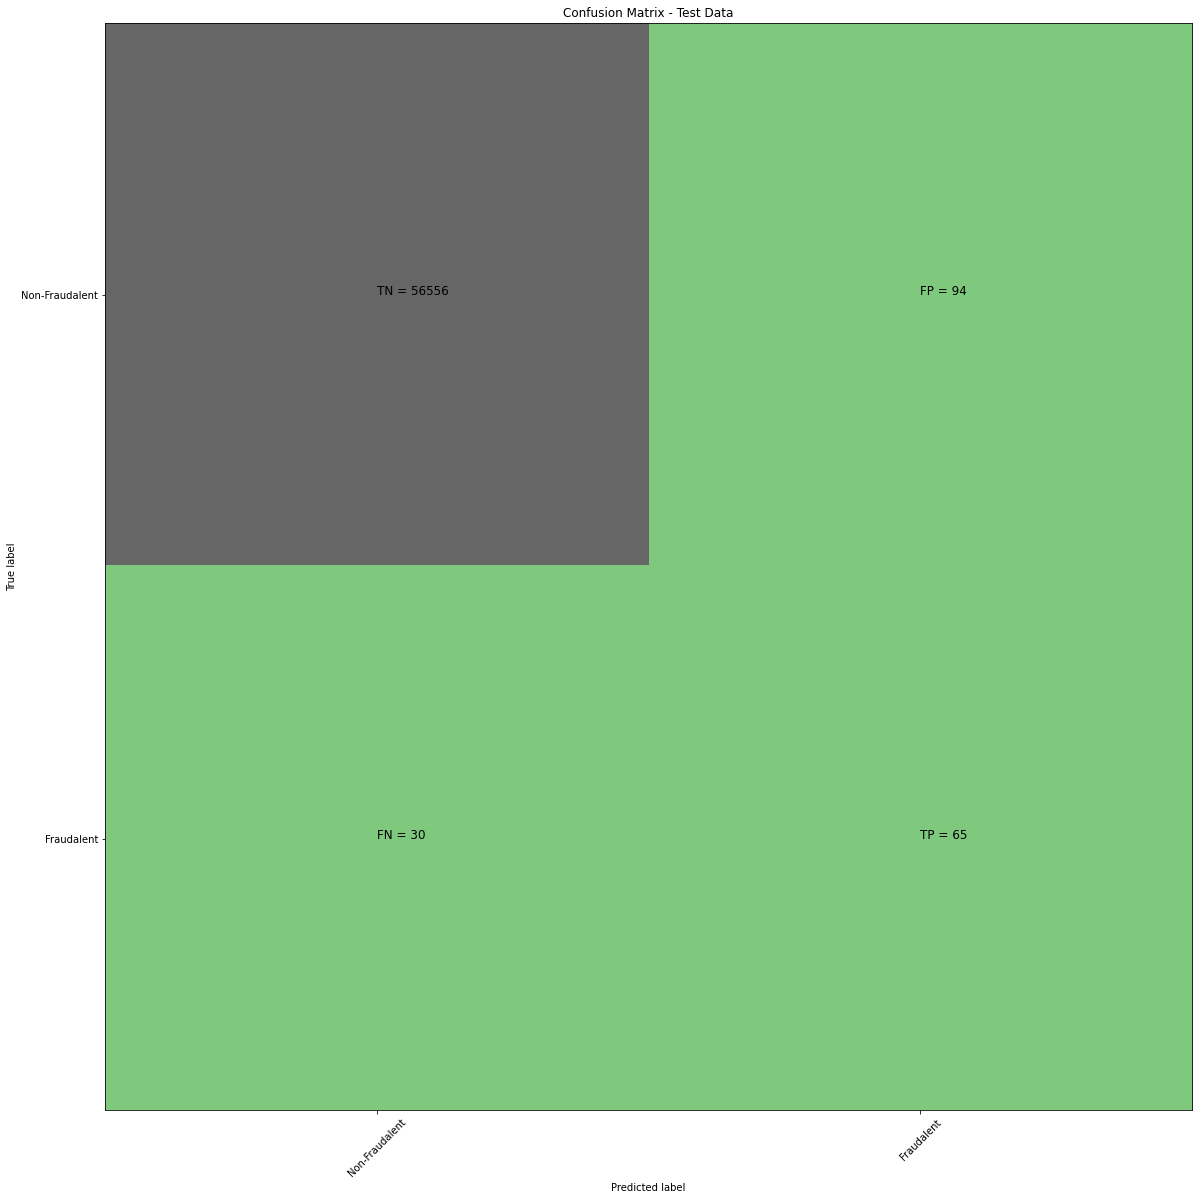

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.41      0.68      0.51        95

    accuracy                           1.00     56745
   macro avg       0.70      0.84      0.76     56745
weighted avg       1.00      1.00      1.00     56745

gini tree_roc_value: 0.8412756073767825
Tree threshold: 1.0
ROC for the test dataset 84.1%


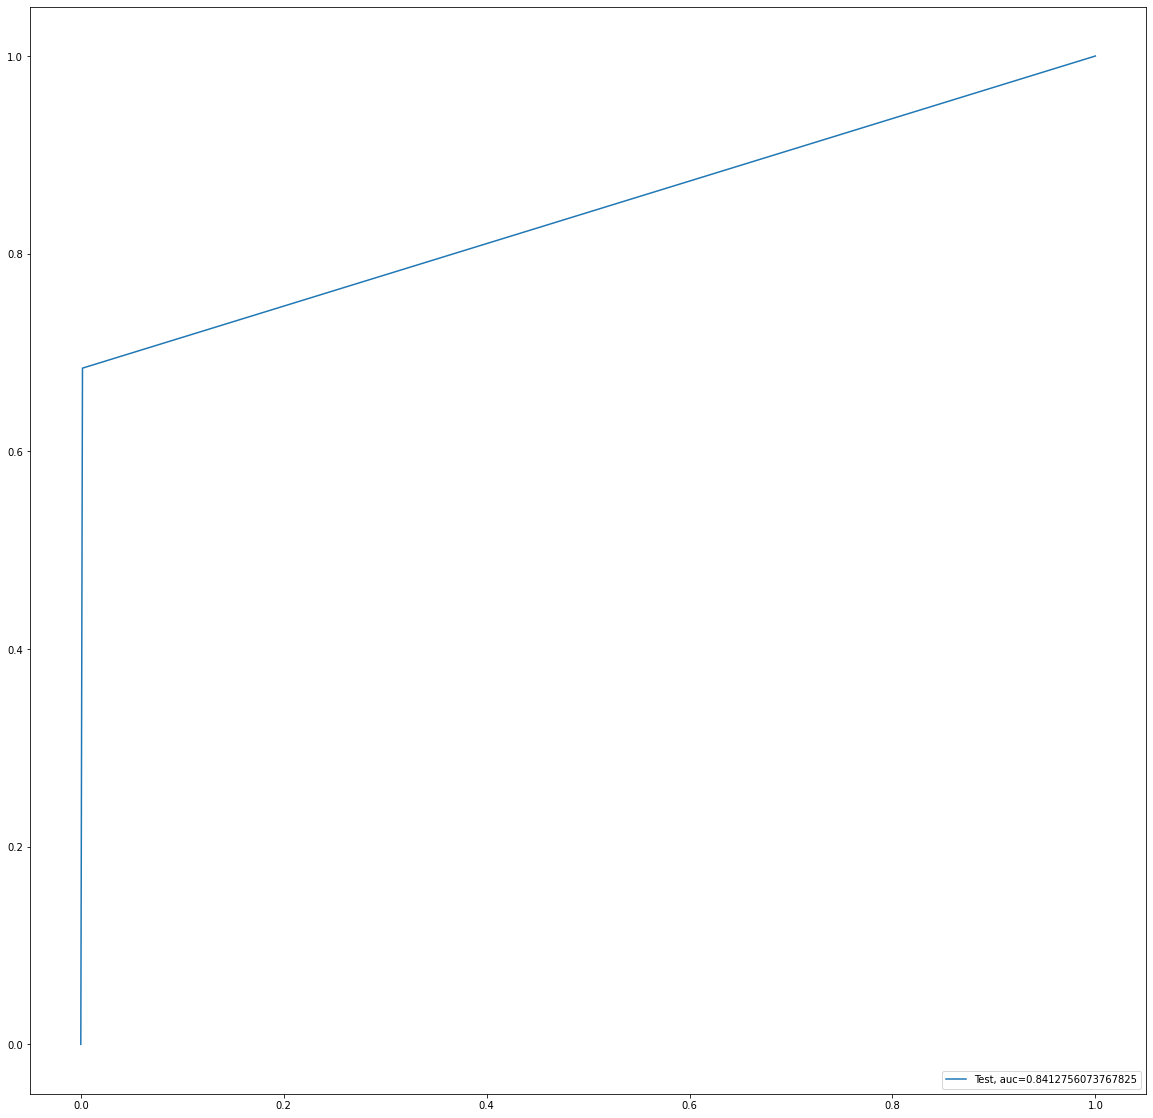

entropy score: 0.9981672394043528
Confusion Matrix


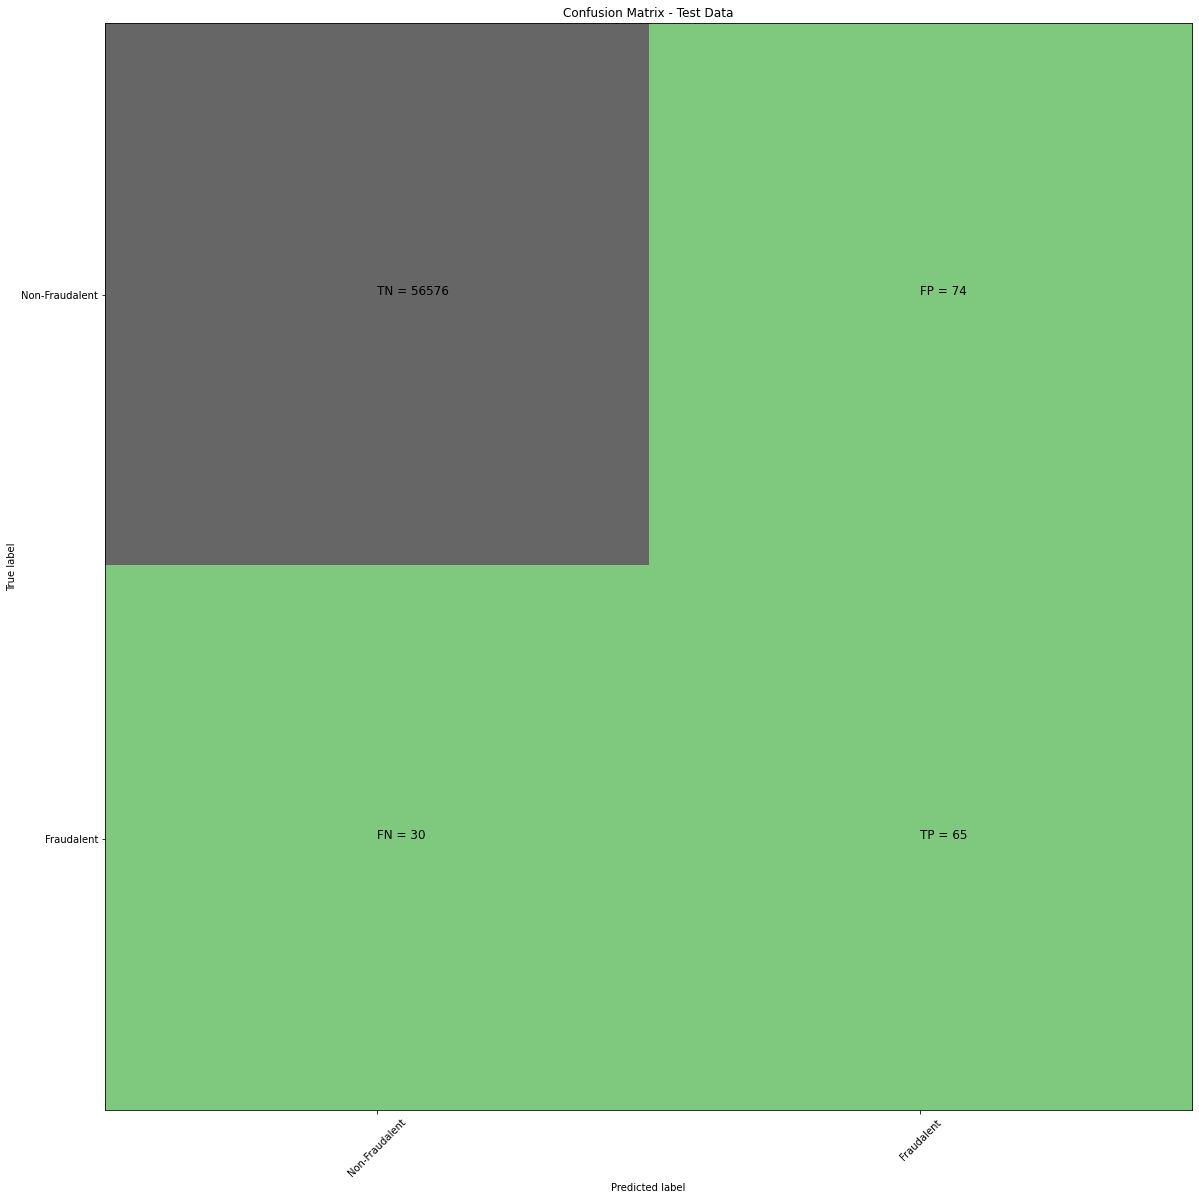

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.47      0.68      0.56        95

    accuracy                           1.00     56745
   macro avg       0.73      0.84      0.78     56745
weighted avg       1.00      1.00      1.00     56745

entropy tree_roc_value: 0.8414521298834022
Tree threshold: 1.0
ROC for the test dataset 84.1%


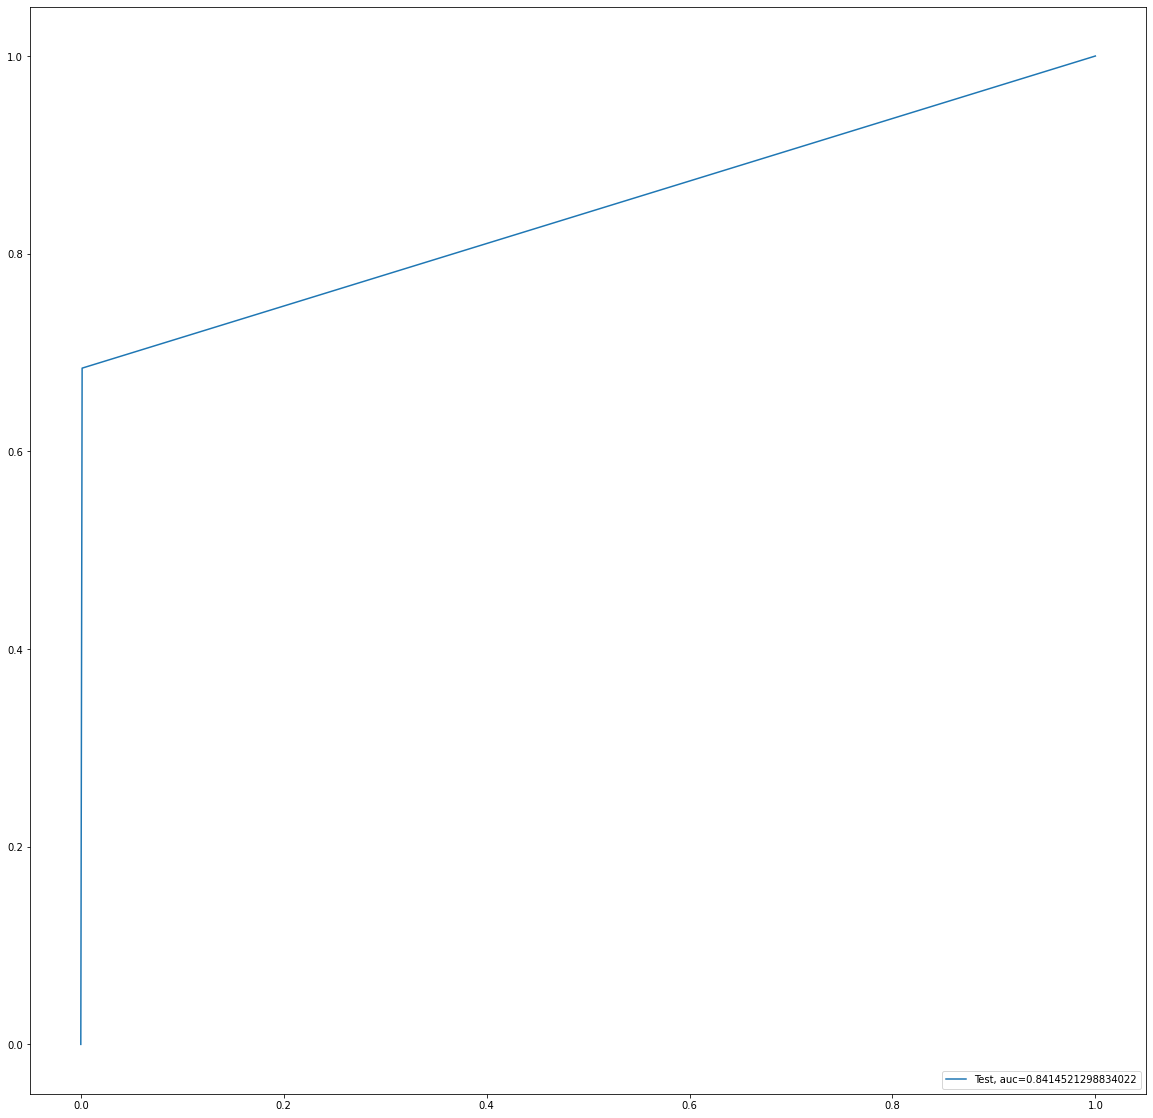

Time Taken by Model: --- 110.14539647102356 seconds ---
--------------------------------------------------------------------------------


In [55]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9995065644550181
Confusion Matrix


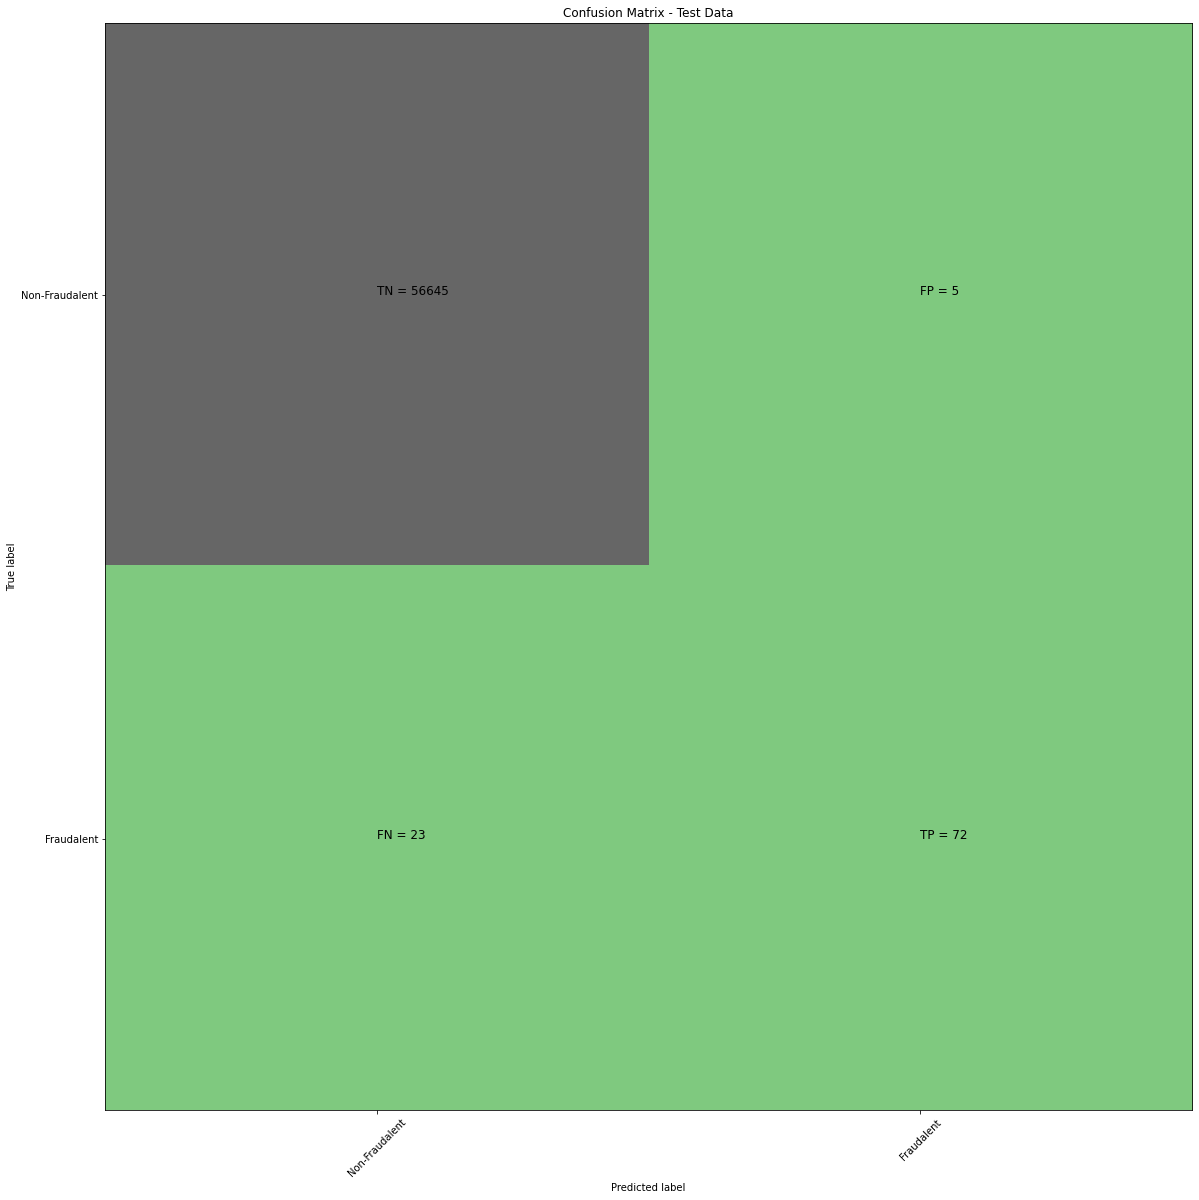

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.94      0.76      0.84        95

    accuracy                           1.00     56745
   macro avg       0.97      0.88      0.92     56745
weighted avg       1.00      1.00      1.00     56745

Random Forest roc_value: 0.9559001254238862
Random Forest threshold: 0.06
ROC for the test dataset 95.6%


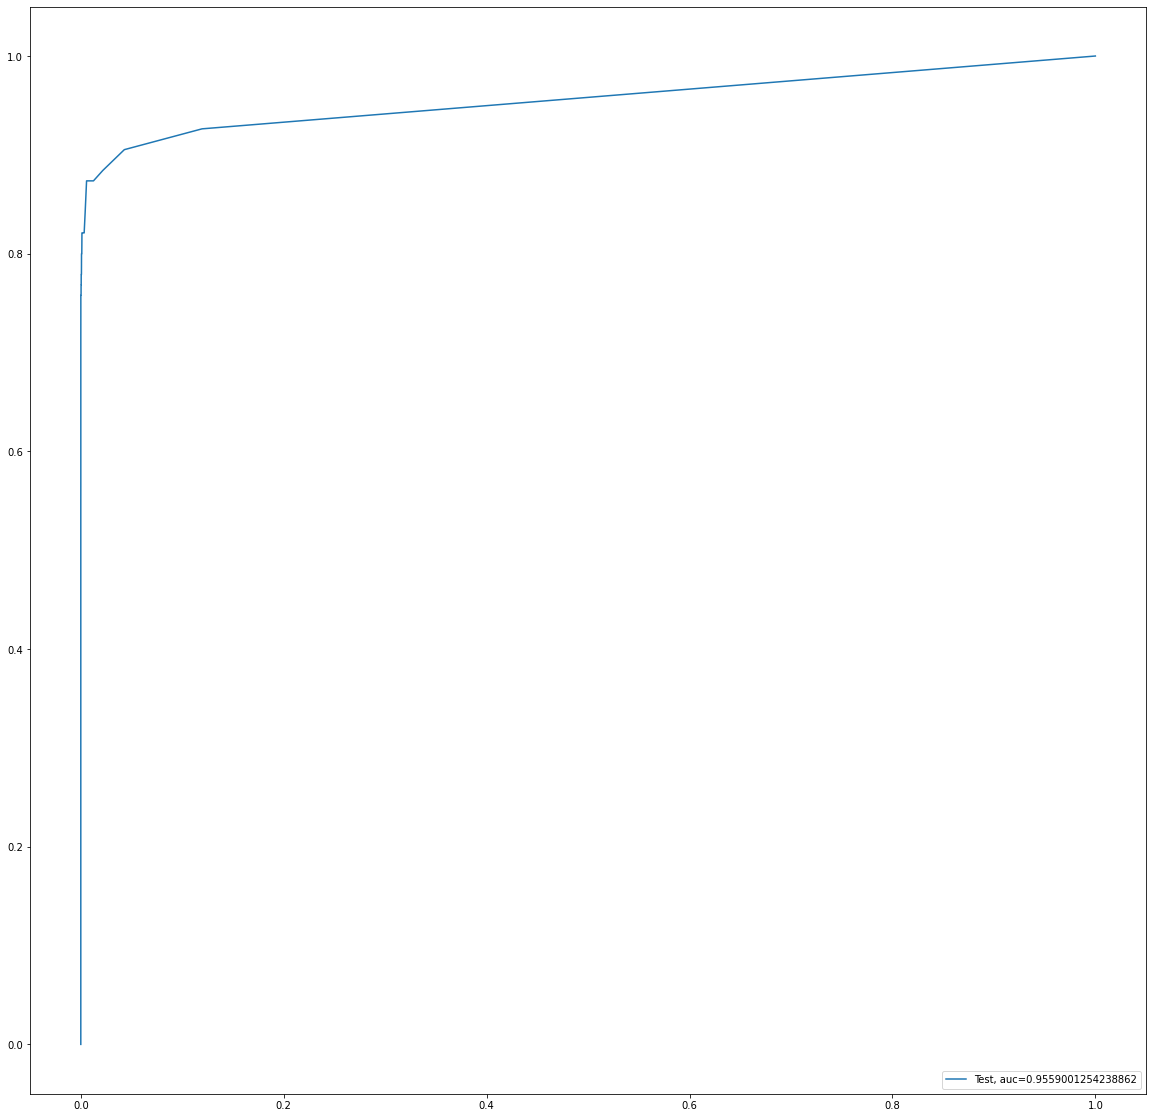

Time Taken by Model: --- 519.9969930648804 seconds ---
--------------------------------------------------------------------------------


In [56]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9934443563309543
Confusion Matrix


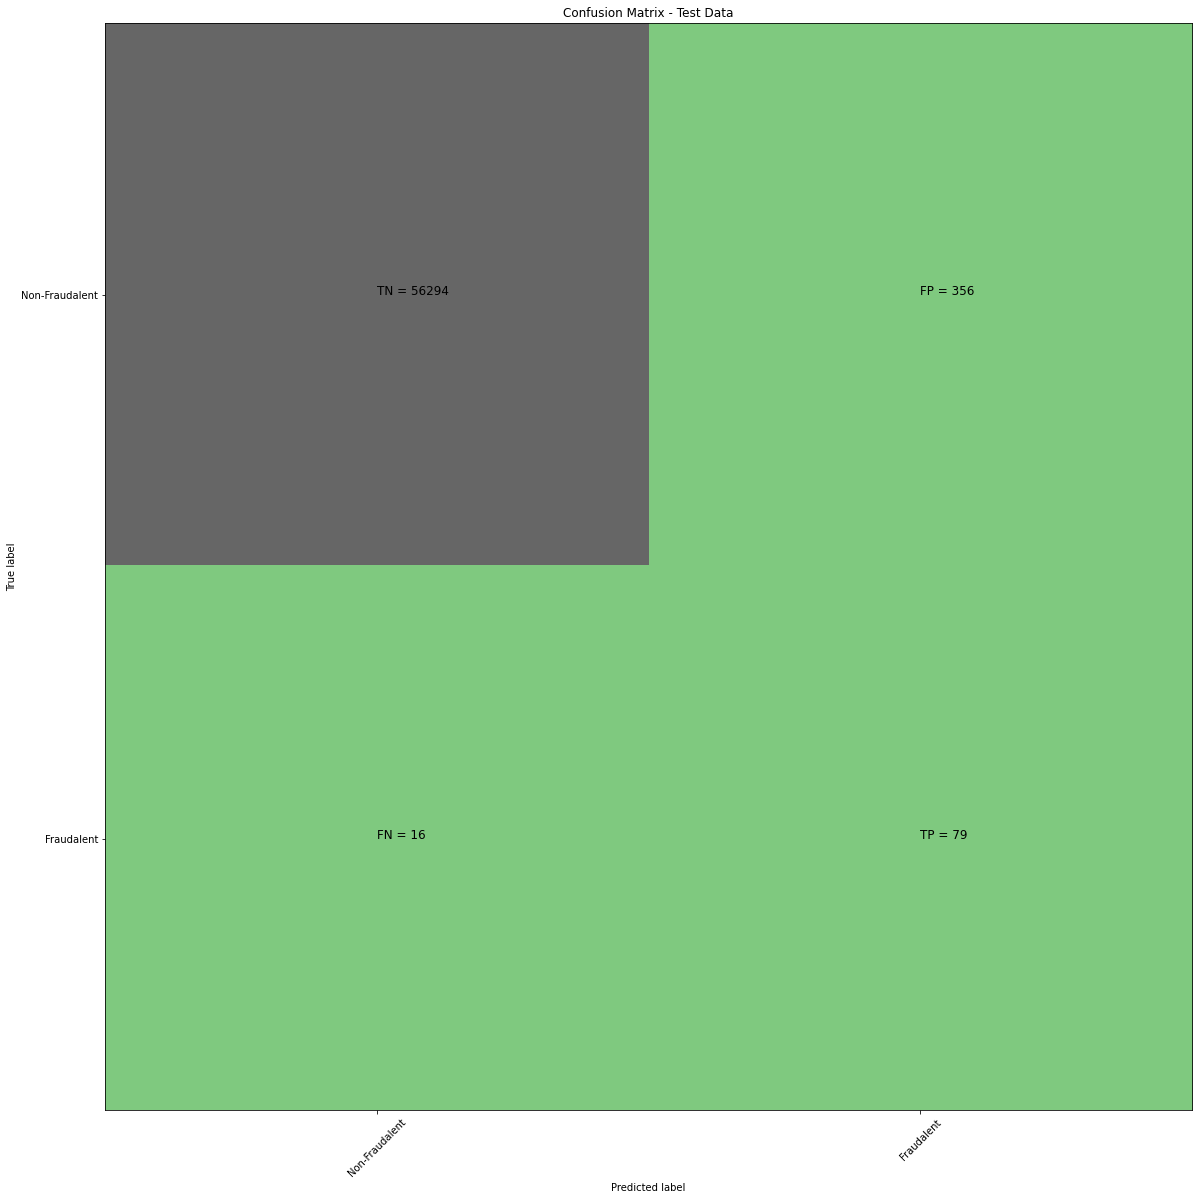

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56650
           1       0.18      0.83      0.30        95

    accuracy                           0.99     56745
   macro avg       0.59      0.91      0.65     56745
weighted avg       1.00      0.99      1.00     56745

XGboost roc_value: 0.9784531054025177
XGBoost threshold: 0.32300472259521484
ROC for the test dataset 97.8%


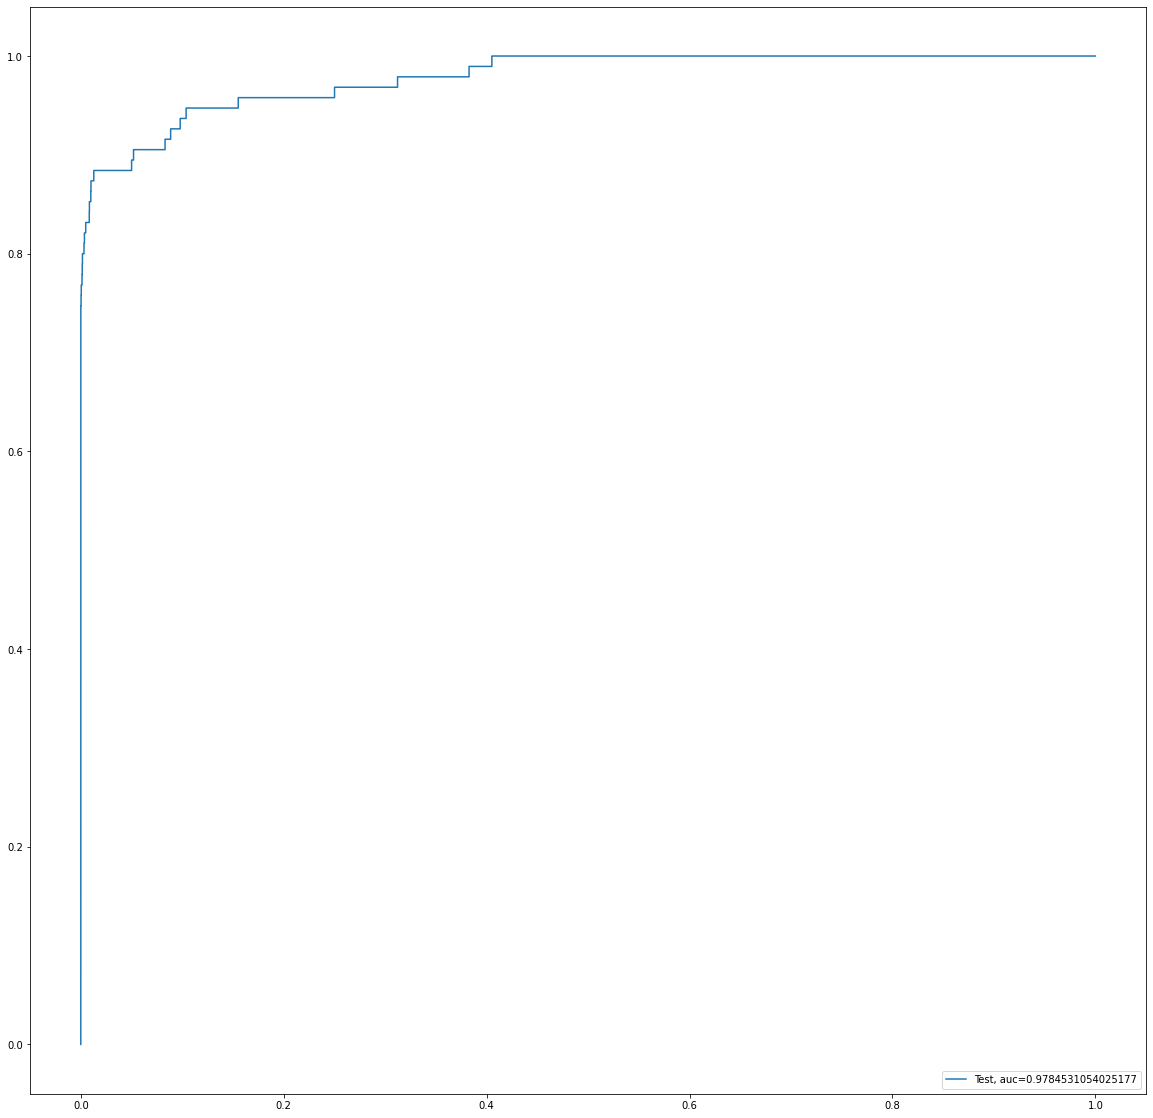

Time Taken by Model: --- 133.18125772476196 seconds ---
--------------------------------------------------------------------------------


In [57]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [58]:
df_Results

,Data Imbalance Handling Method,Model,Accuracy,ROC Value,Threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999048,0.980998,0.002000
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998978,0.979940,0.005365
2,Power Transformer,Tree Model with gini criteria,0.998855,0.871364,1.000000
3,Power Transformer,Tree Model with entropy criteria,0.999189,0.902443,1.000000
4,Power Transformer,Random Forest,0.999542,0.967642,0.010000
5,Power Transformer,XGBoost,0.999559,0.969534,0.002105
6,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998819,0.982762,0.001524
7,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998890,0.935477,0.012036
8,StratifiedKFold Cross Validation,Tree Model with gini criteria,0.998819,0.810253,1.000000
9,StratifiedKFold Cross Validation,Tree Model with entropy criteria,0.999189,0.826201,1.000000


### Oversampling with ADASYN Oversampling

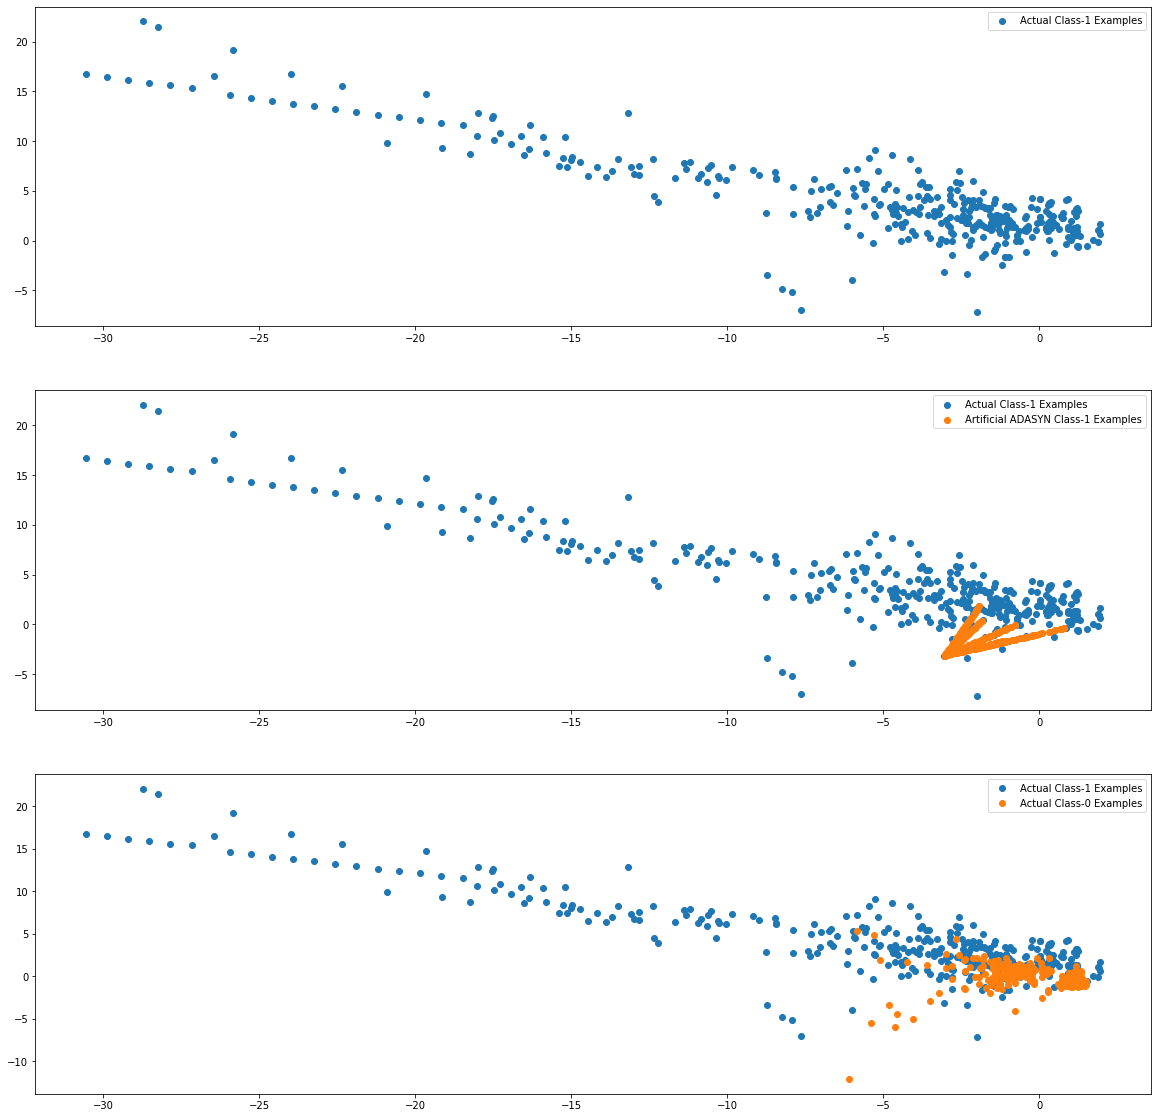

In [59]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [60]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index] 
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9812190207064061
Max auc_roc for l1: 0.5
Parameters for L2 regularisation
[[ 1.04094593  1.09156032  0.81791422  0.95759964  0.92946207 -0.9230891
  -1.05151448 -0.52990099 -0.40795382 -1.03673196  0.85386573 -1.46978493
  -0.18401044 -1.99468772  0.13266566 -0.97457662 -1.27104548 -0.62396171
   0.36069235 -1.46197859 -0.18816442  0.75798426  0.69680244 -0.99292195
   0.79544485  0.24577128  0.00672059  1.36998267  0.01327375]]
[-4.71019028]
{1: array([[0.62016064, 0.63942265, 0.71751515, 0.86215891, 0.95447343,
        0.97227663, 0.97663144, 0.9797797 , 0.98105246, 0.98143884,
        0.98150699, 0.98150699, 0.98150699, 0.98150699, 0.98150699,
        0.98150699, 0.98150699, 0.98150699, 0.98150699, 0.98150699],
       [0.6152297 , 0.63467496, 0.71361111, 0.86101912, 0.95464188,
        0.97223876, 0.97651451, 0.97972706, 0.98099805, 0.98137923,
        0.98144759, 0.98144759, 0.98144759, 0.98144759, 0.98144759,


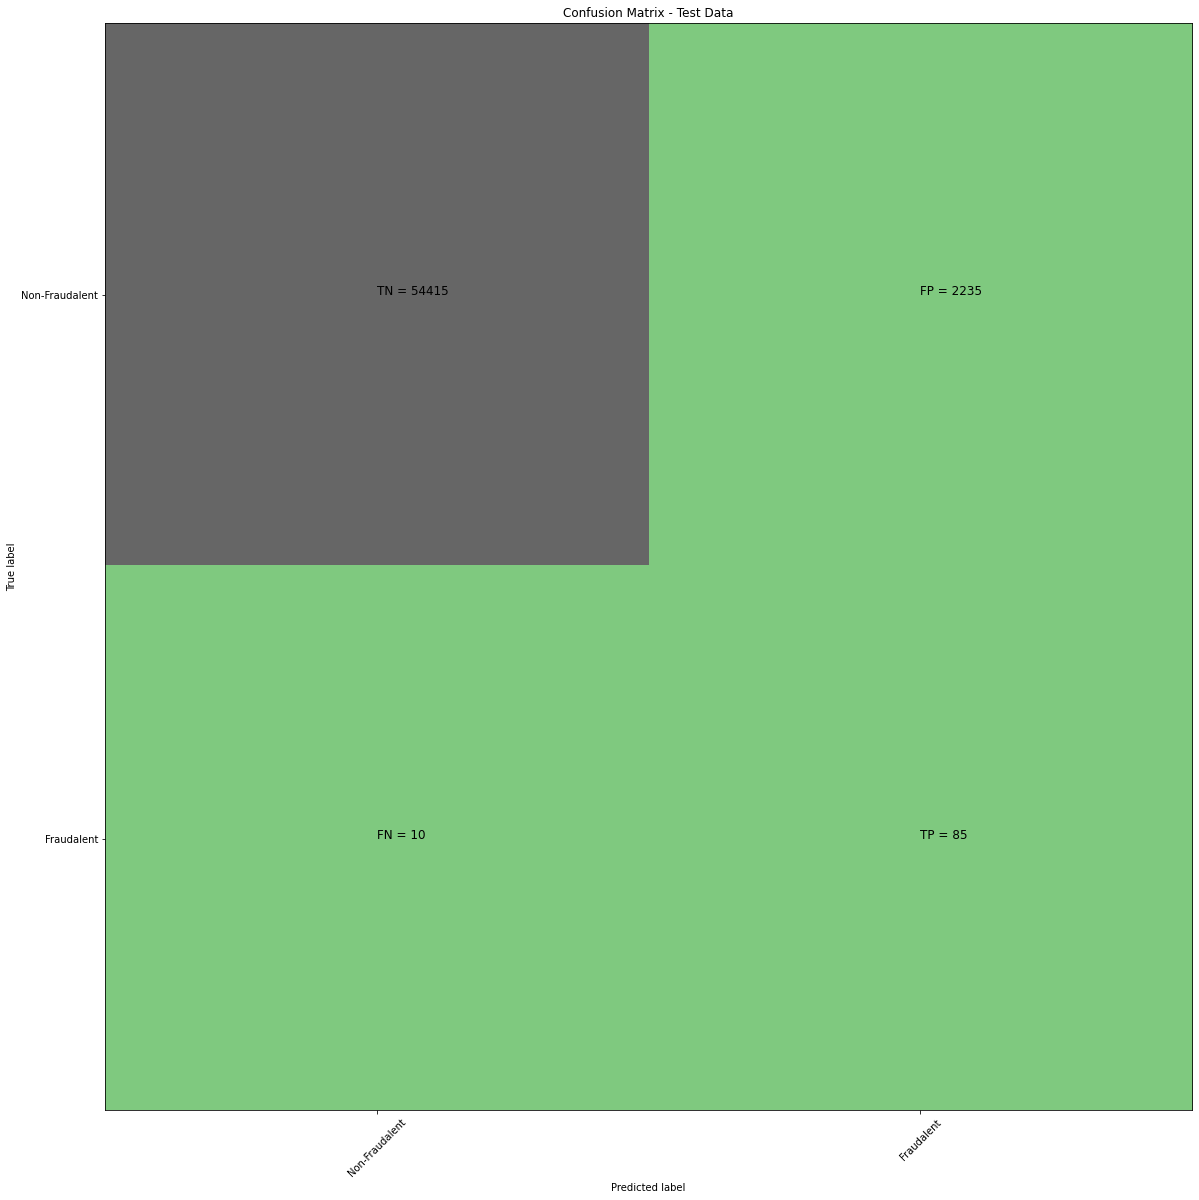

******* Classification Report ********
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56650
           1       0.04      0.89      0.07        95

    accuracy                           0.96     56745
   macro avg       0.52      0.93      0.53     56745
weighted avg       1.00      0.96      0.98     56745

Accuarcy of Logistic model with L1 regularisation : 0.9983258436866684
Confusion Matrix


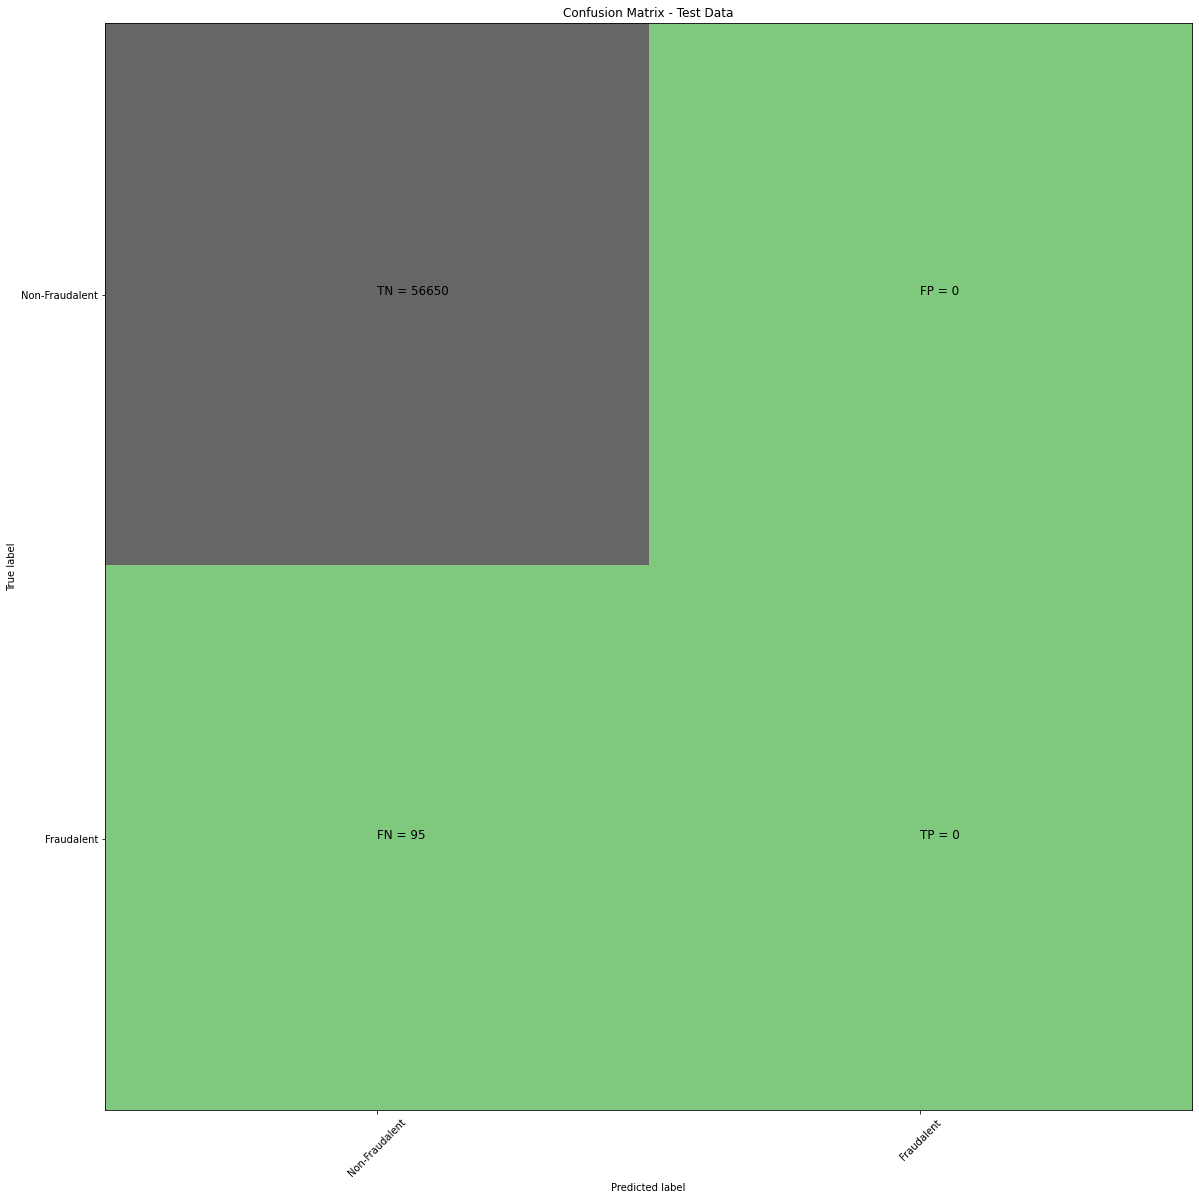

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56745
   macro avg       0.50      0.50      0.50     56745
weighted avg       1.00      1.00      1.00     56745

l2 roc_value: 0.9743903934593765
l2 threshold: 0.6354699495449345
ROC for the test dataset 97.4%


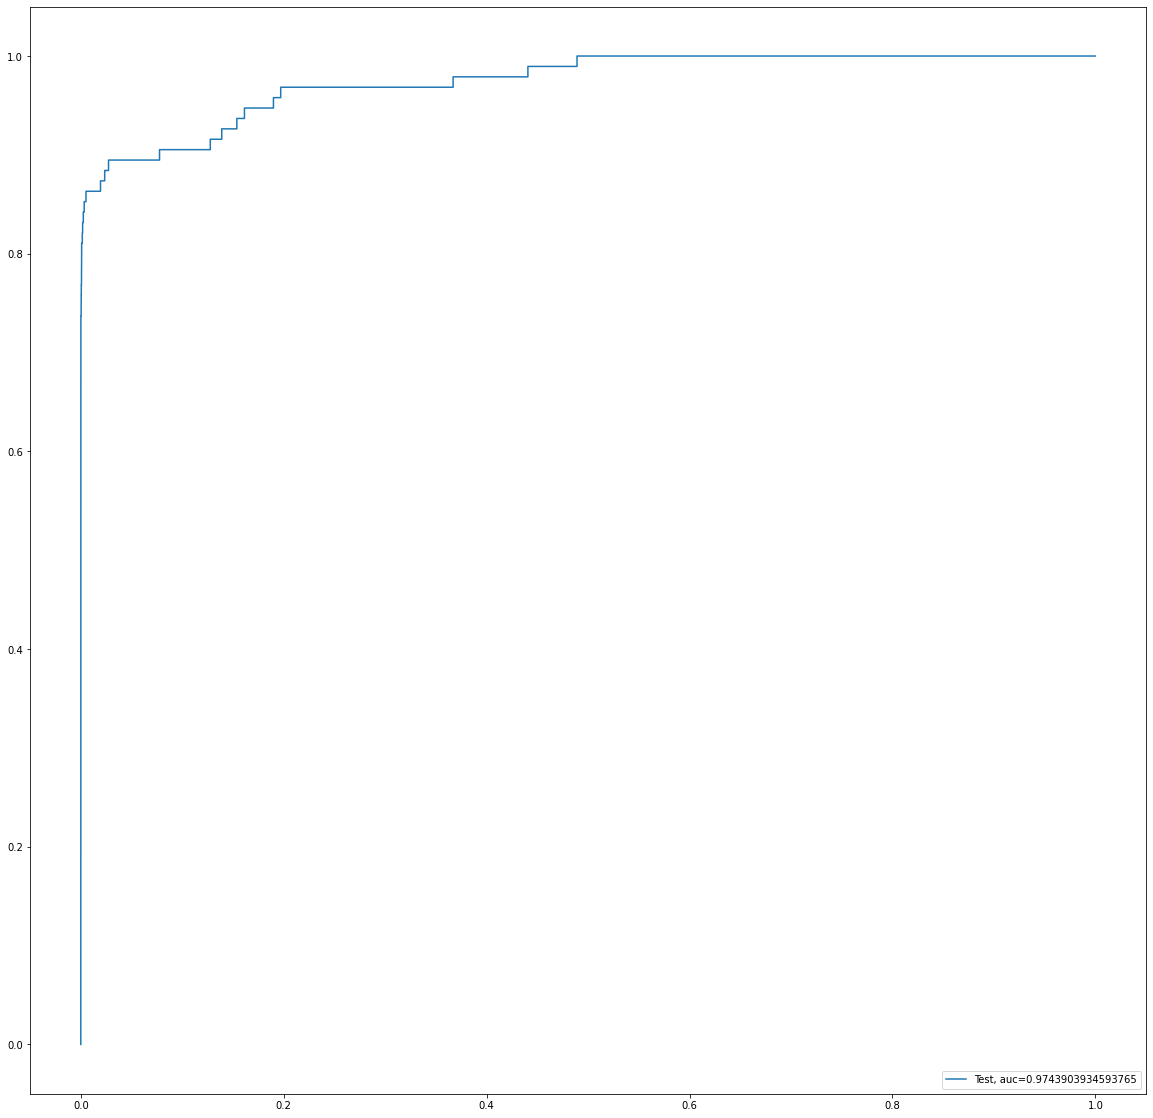

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


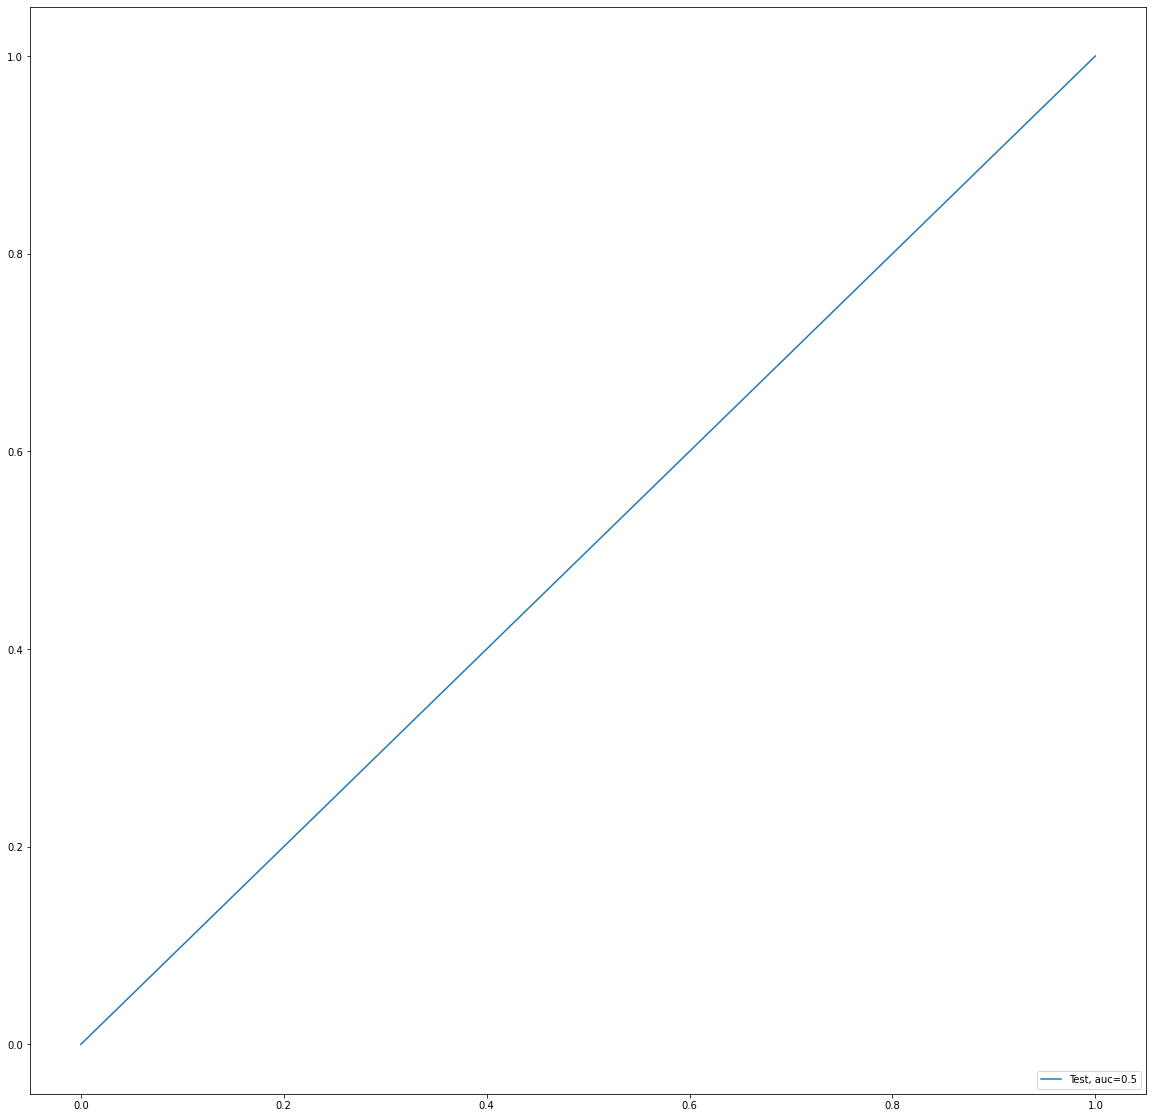

Time Taken by Model: --- 685.6355664730072 seconds ---
--------------------------------------------------------------------------------


In [61]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
model score
0.9959820248480042
Confusion Matrix


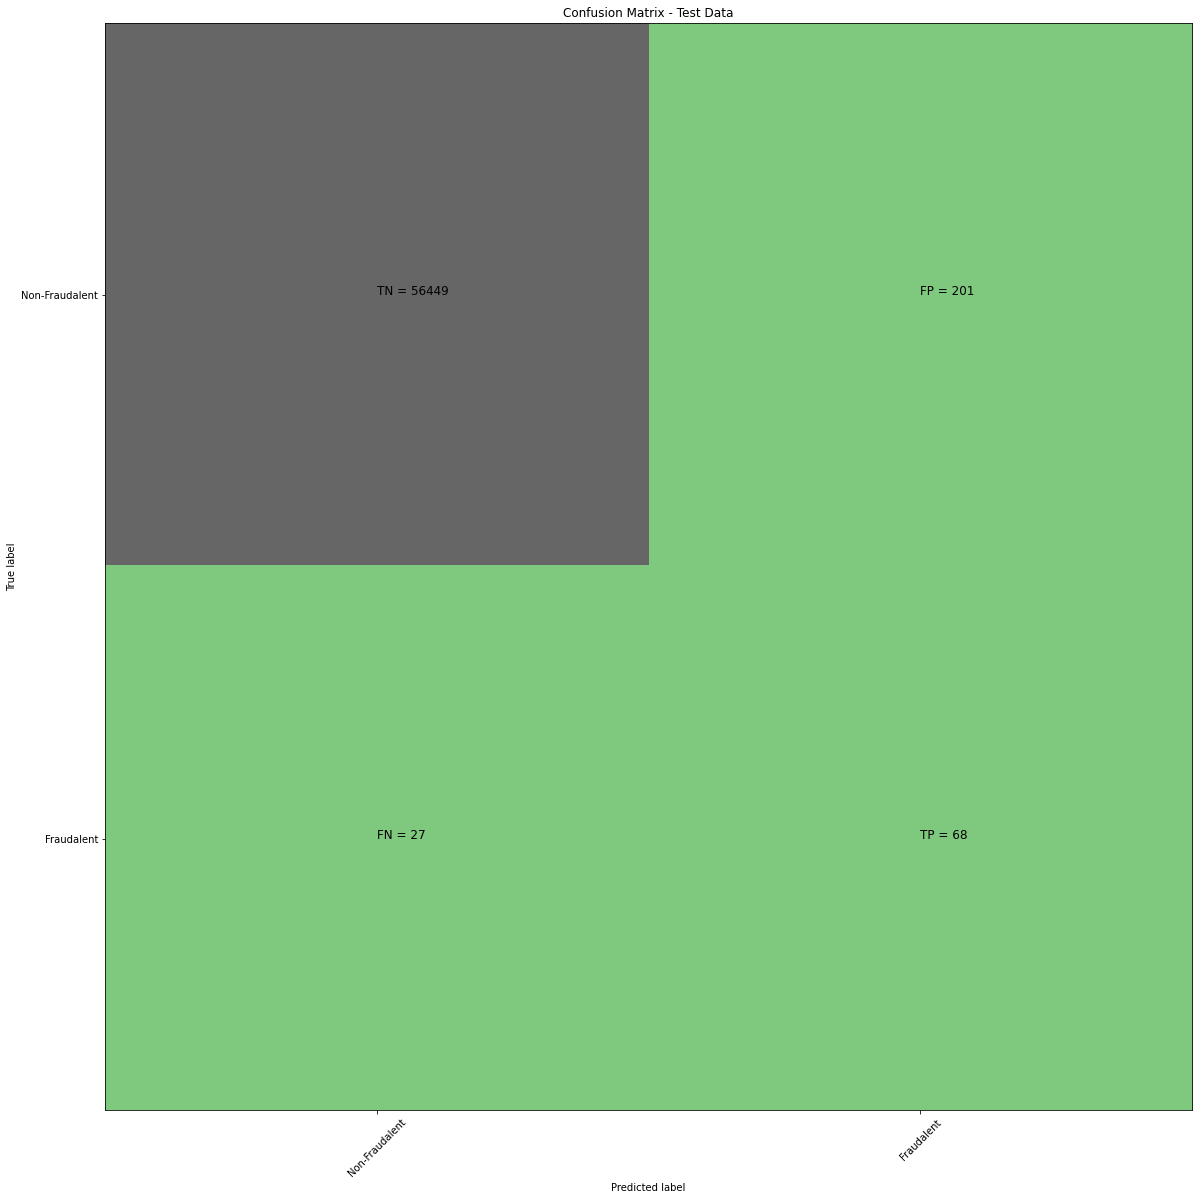

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.25      0.72      0.37        95

    accuracy                           1.00     56745
   macro avg       0.63      0.86      0.69     56745
weighted avg       1.00      1.00      1.00     56745

KNN roc_value: 0.8671300227621127
KNN threshold: 0.2
ROC for the test dataset 86.7%


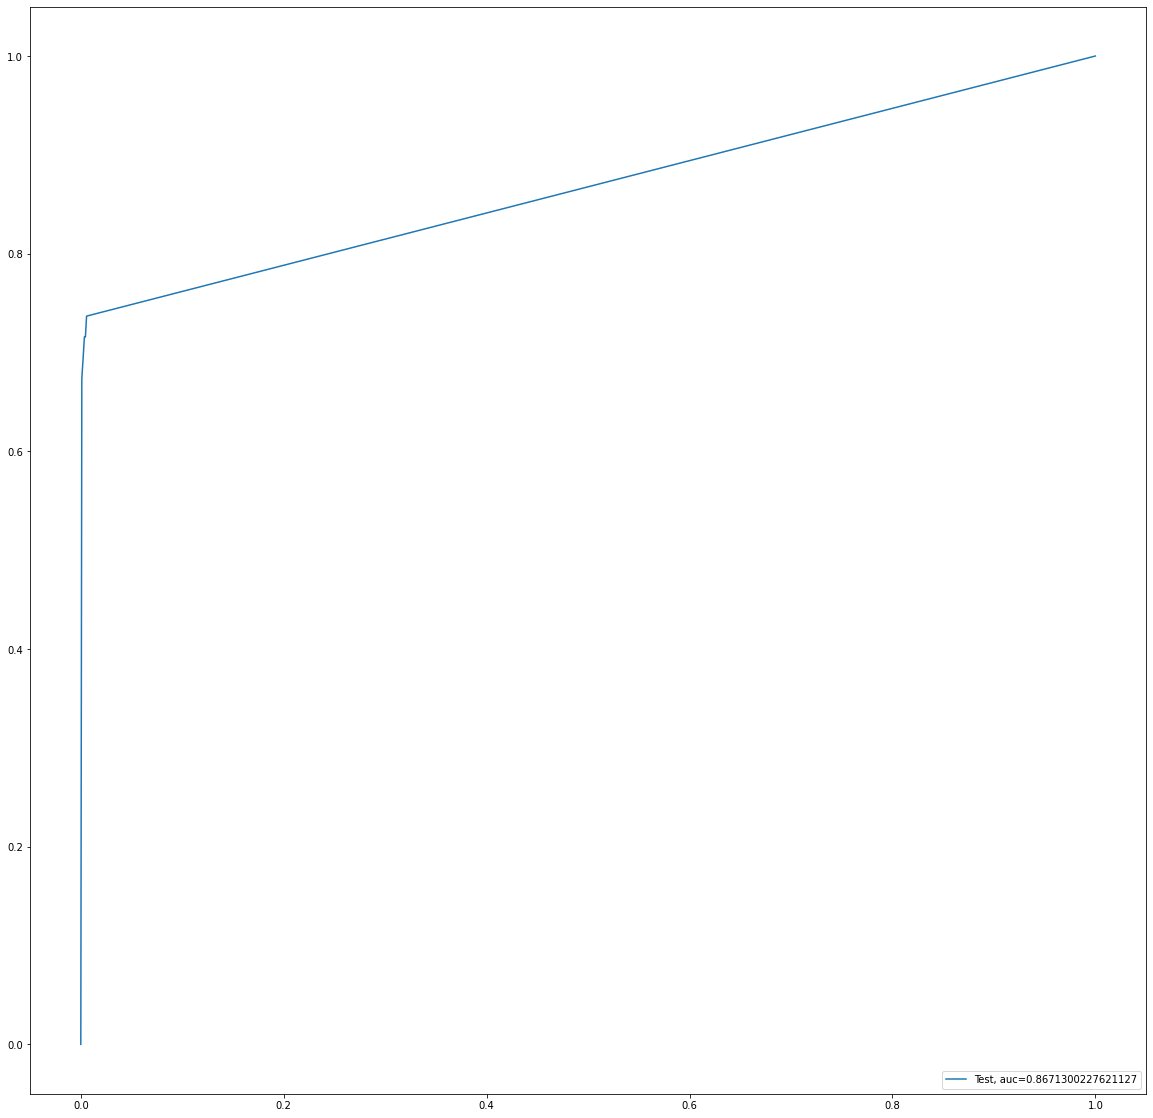

Time Taken by Model: --- 3075.777773141861 seconds ---
--------------------------------------------------------------------------------


In [62]:
# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9980438805181073
Confusion Matrix


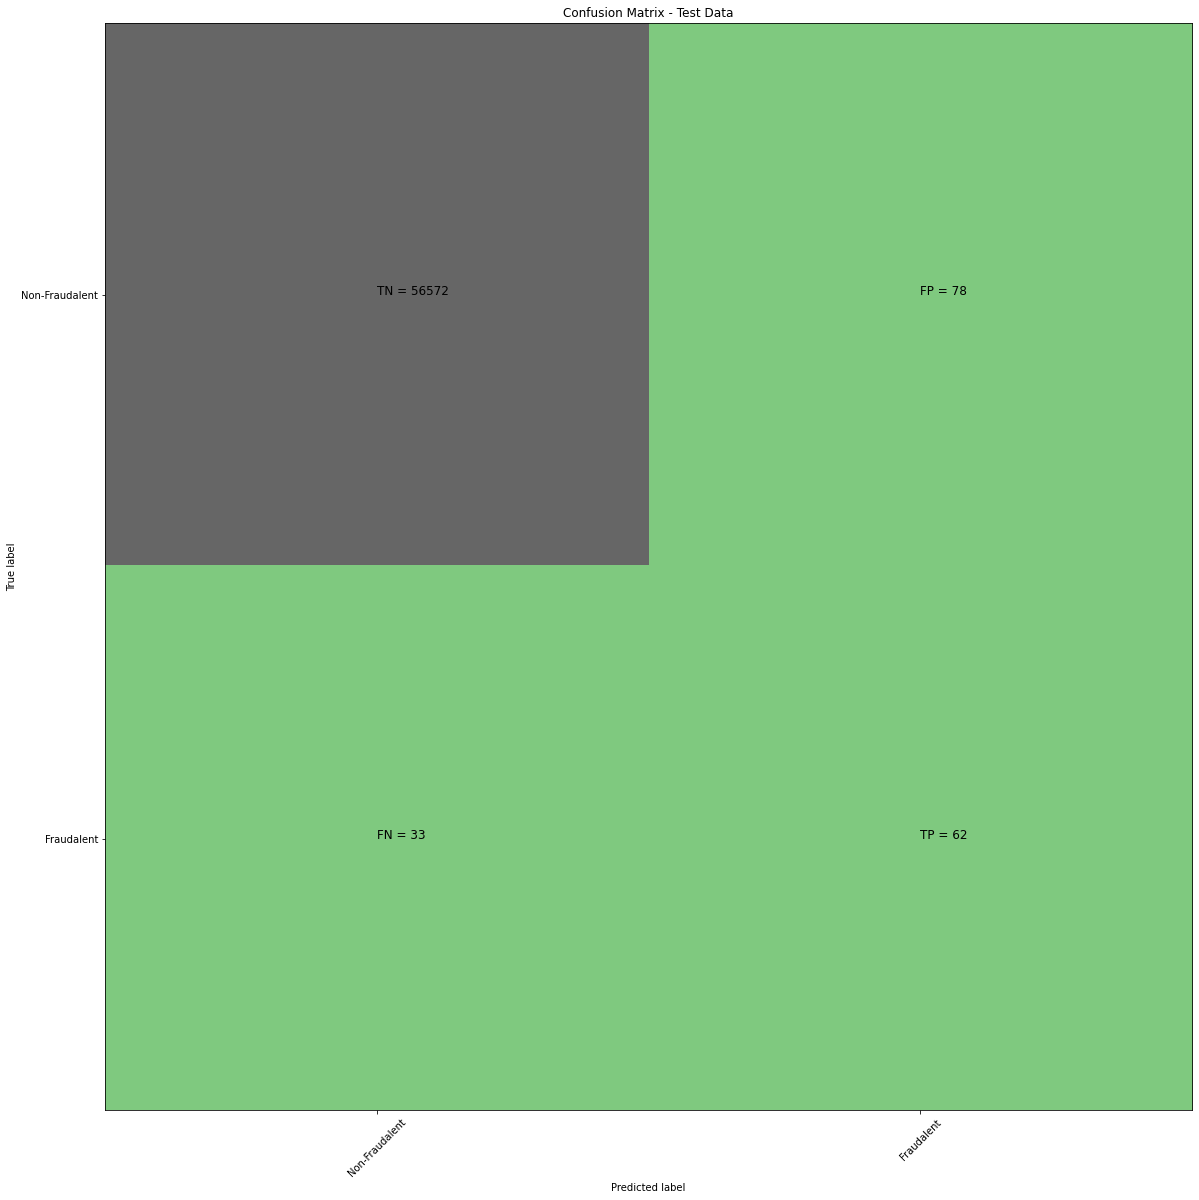

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.44      0.65      0.53        95

    accuracy                           1.00     56745
   macro avg       0.72      0.83      0.76     56745
weighted avg       1.00      1.00      1.00     56745

gini tree_roc_value: 0.8256273516978678
Tree threshold: 1.0
ROC for the test dataset 82.6%


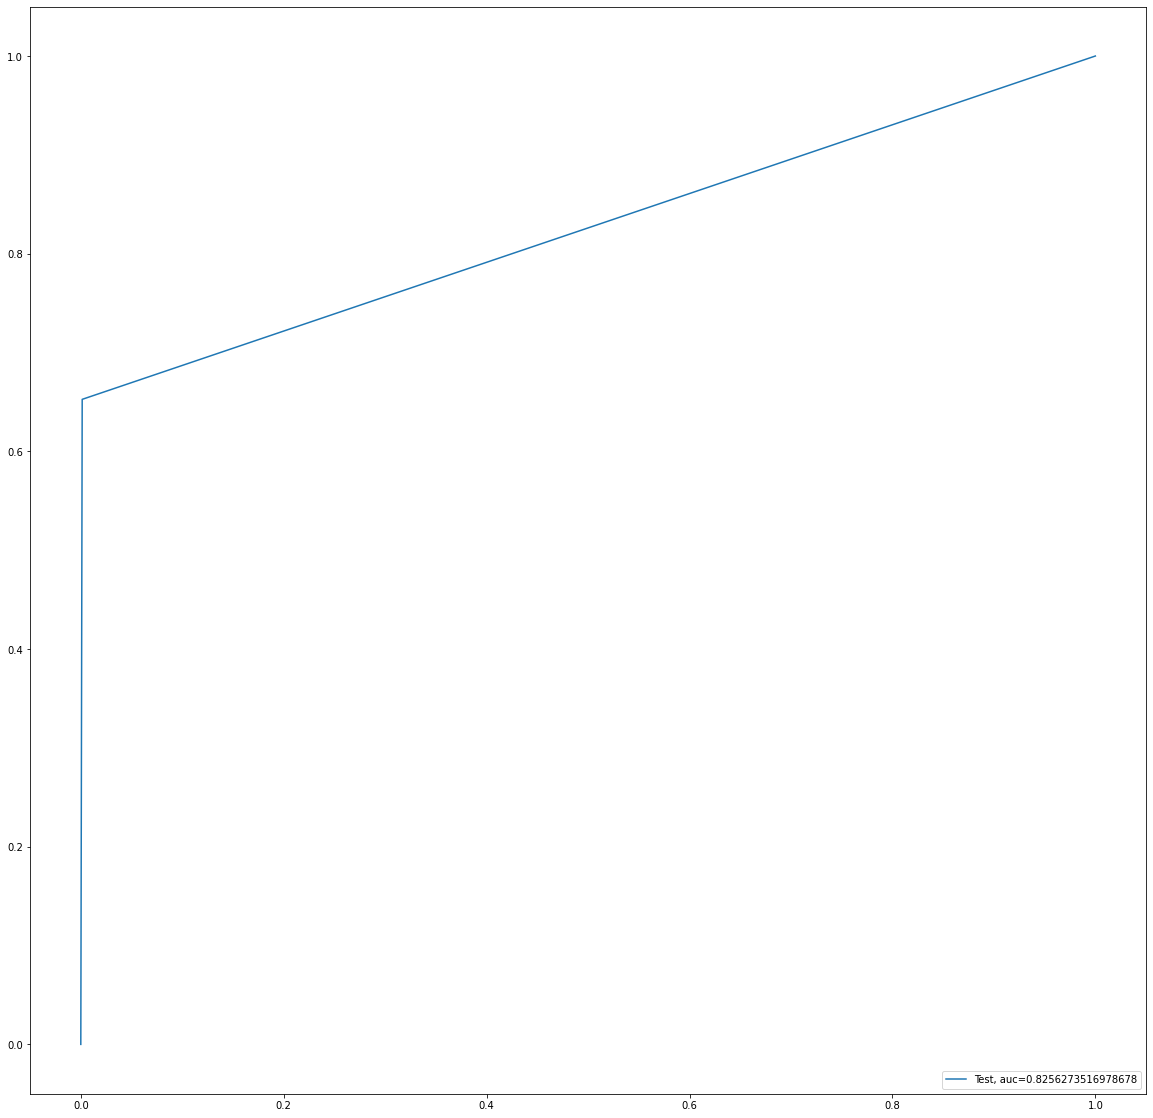

entropy score: 0.9983787117807736
Confusion Matrix


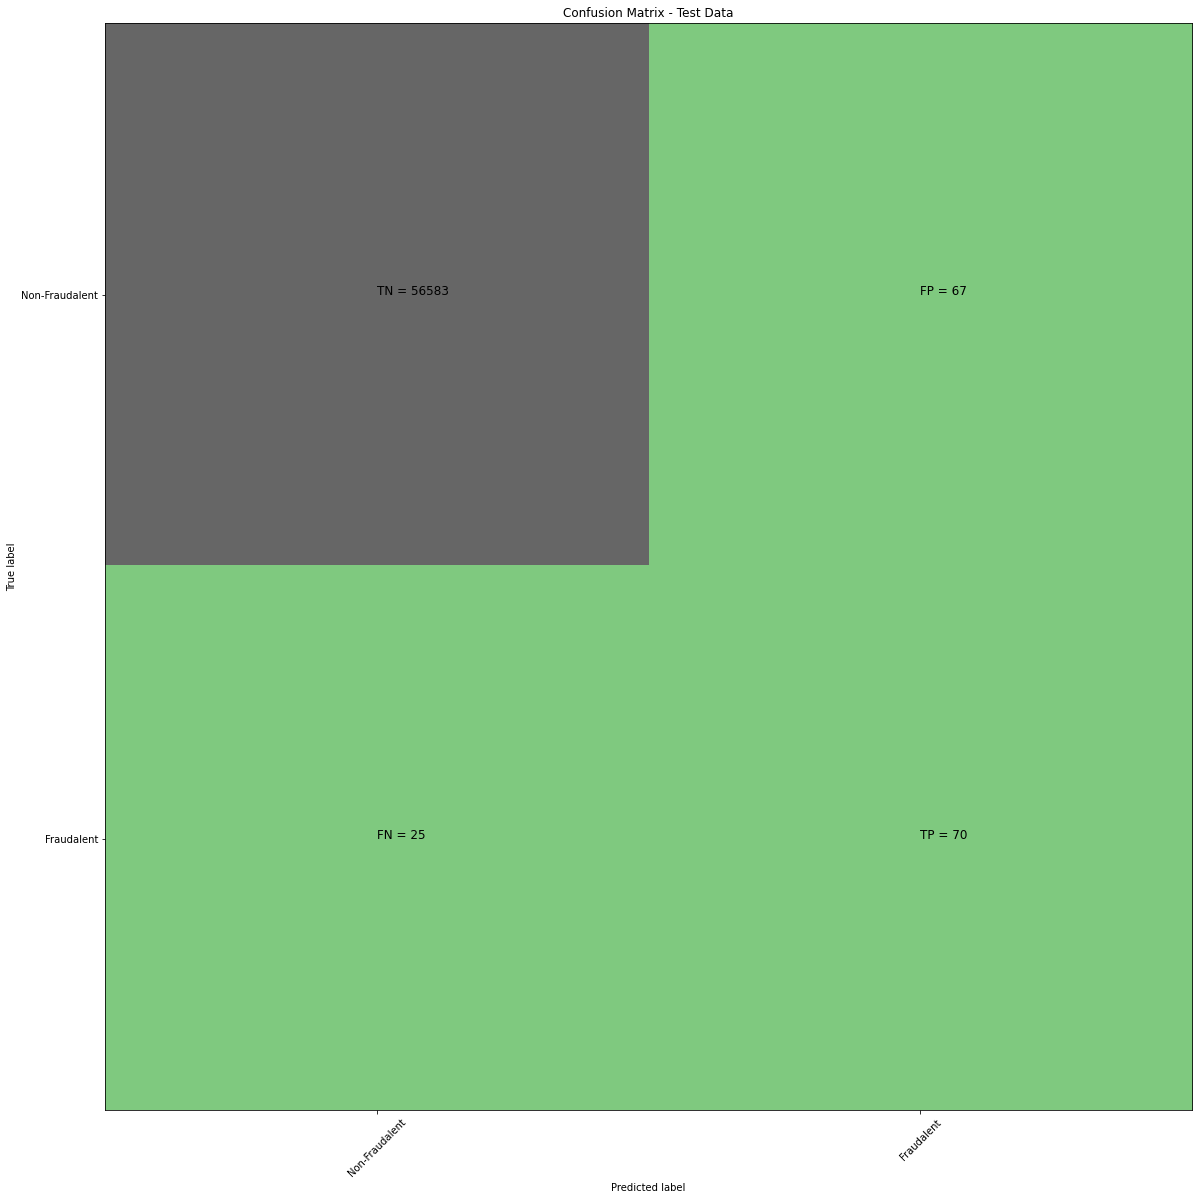

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.51      0.74      0.60        95

    accuracy                           1.00     56745
   macro avg       0.76      0.87      0.80     56745
weighted avg       1.00      1.00      1.00     56745

entropy tree_roc_value: 0.8678297022344034
Tree threshold: 1.0
ROC for the test dataset 86.8%


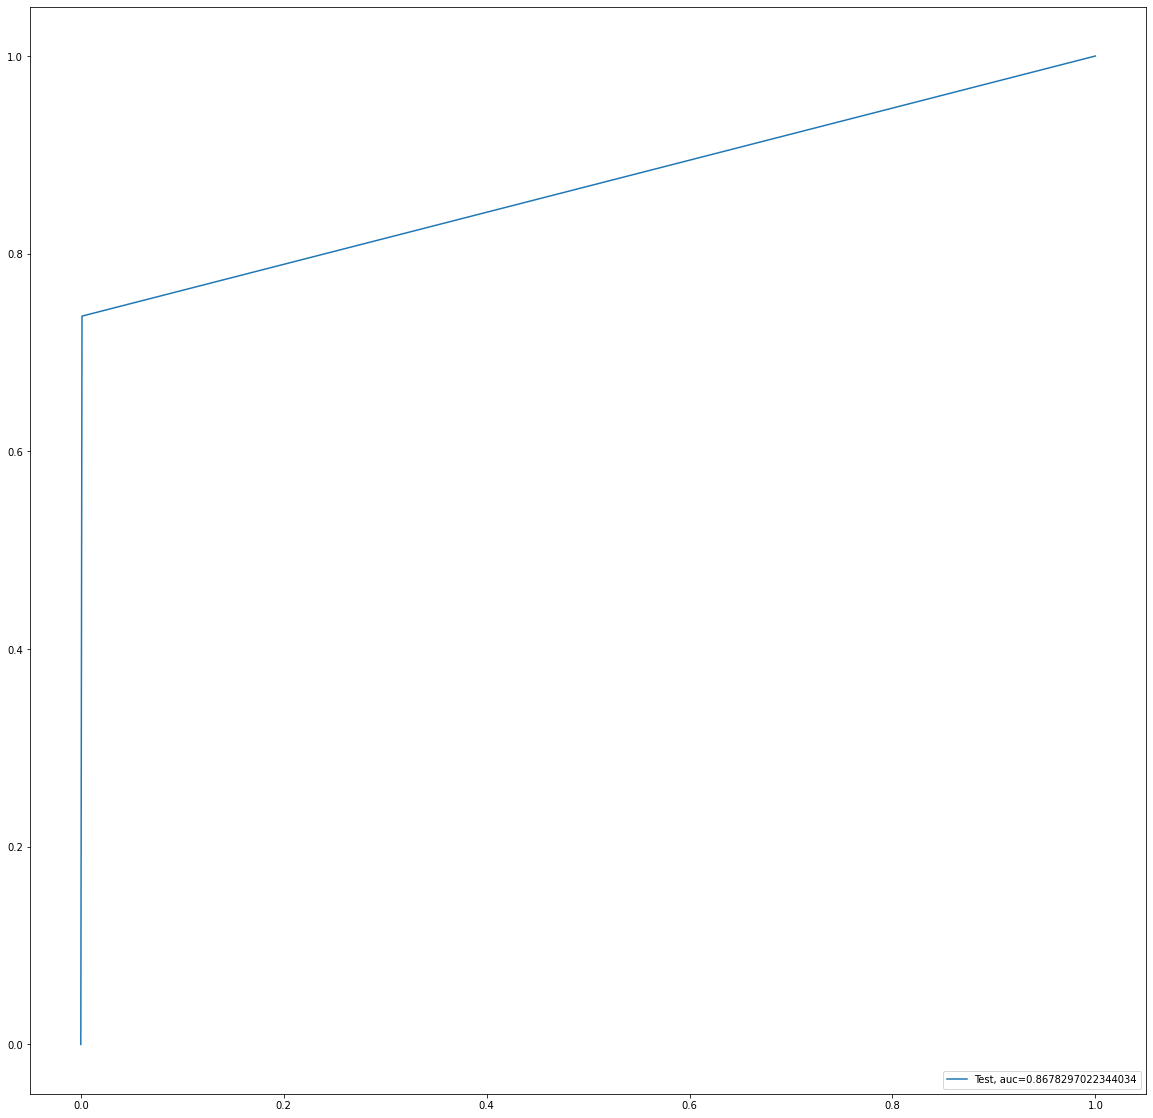

Time Taken by Model: --- 88.76250982284546 seconds ---
--------------------------------------------------------------------------------


In [63]:
# Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.999488941756983
Confusion Matrix


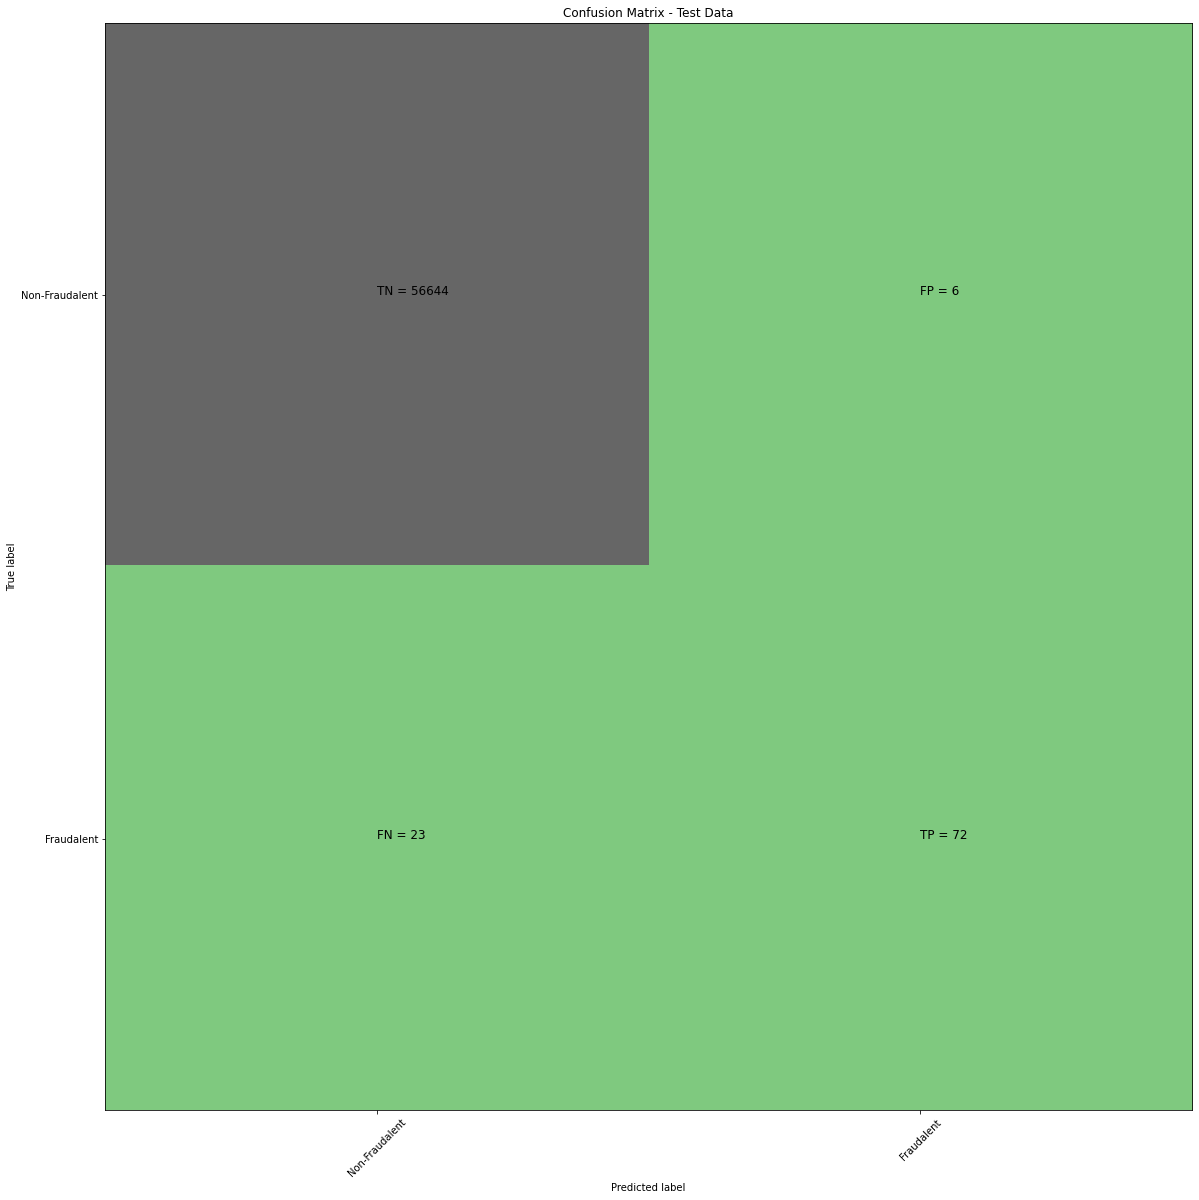

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.92      0.76      0.83        95

    accuracy                           1.00     56745
   macro avg       0.96      0.88      0.92     56745
weighted avg       1.00      1.00      1.00     56745

Random Forest roc_value: 0.9562534491568728
Random Forest threshold: 0.04
ROC for the test dataset 95.6%


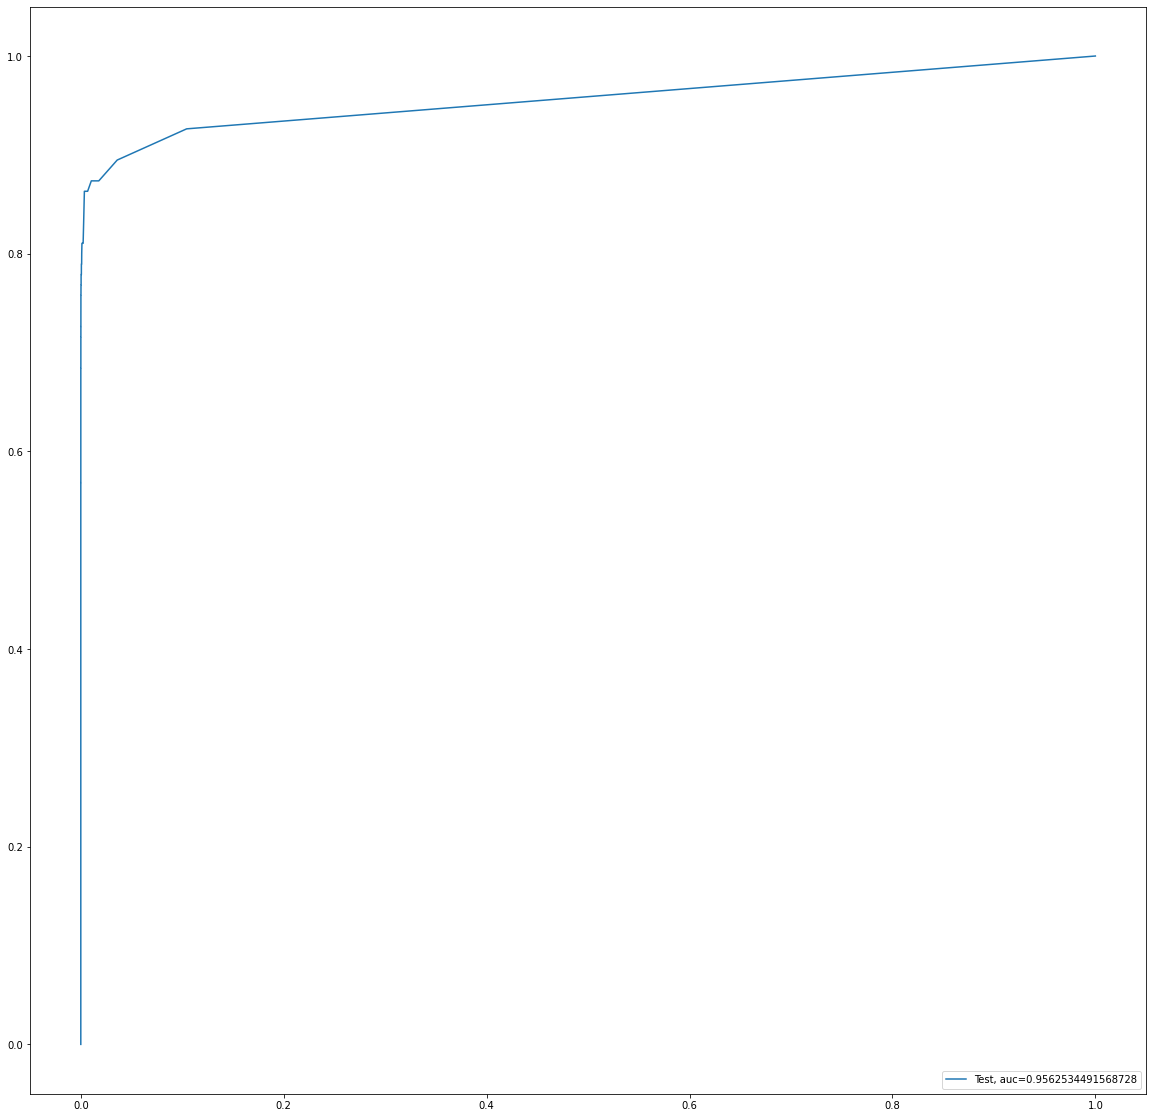

Time Taken by Model: --- 446.2204689979553 seconds ---
--------------------------------------------------------------------------------


In [64]:
# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9854965195171381
Confusion Matrix


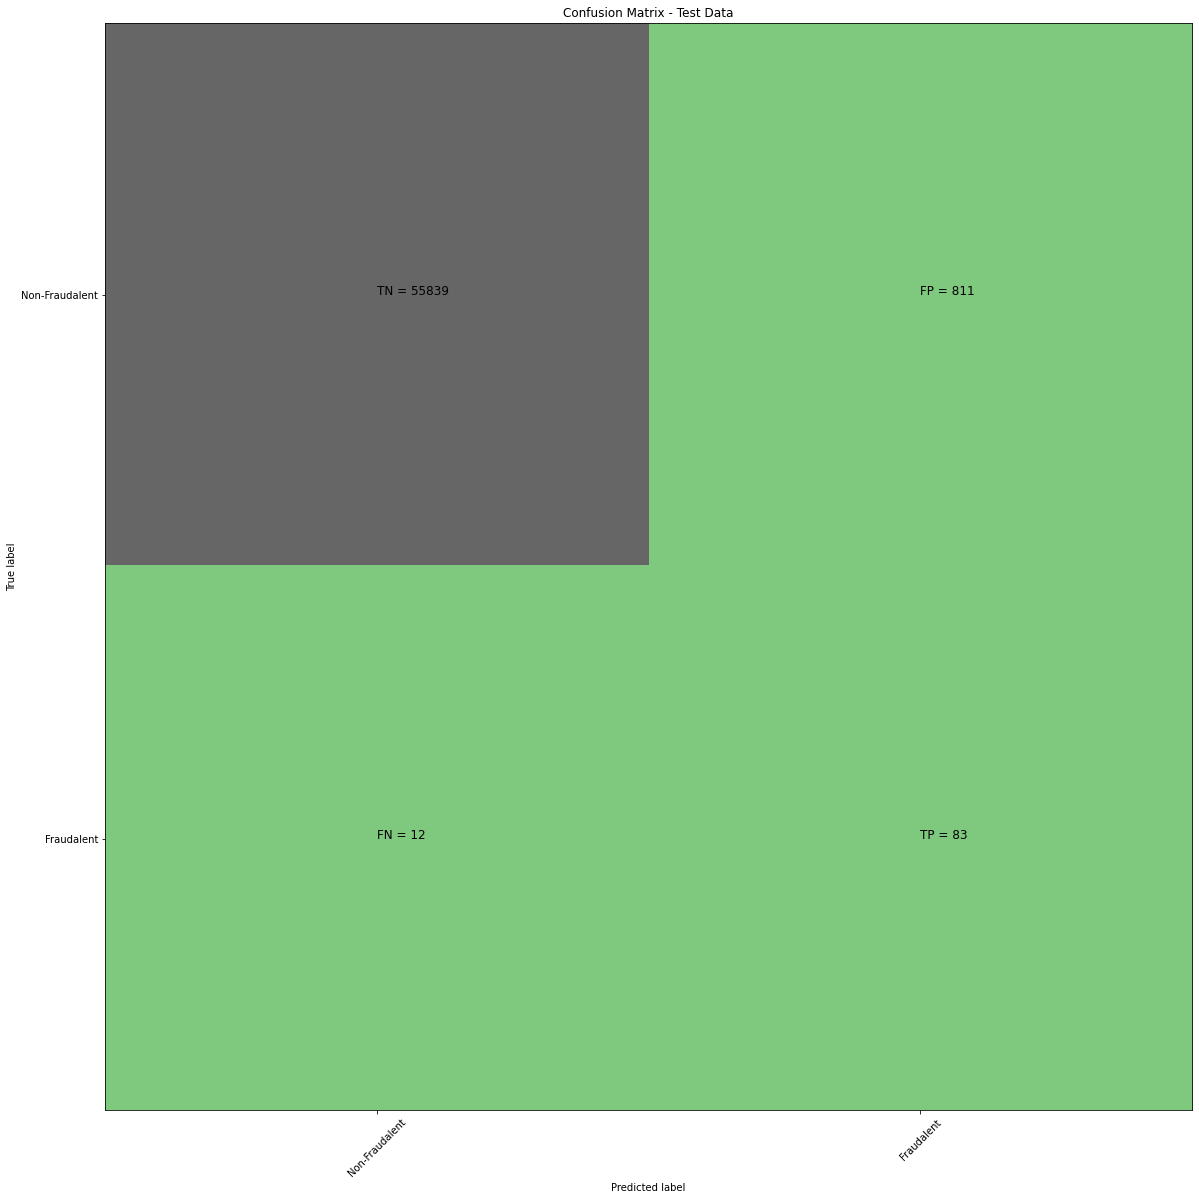

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56650
           1       0.09      0.87      0.17        95

    accuracy                           0.99     56745
   macro avg       0.55      0.93      0.58     56745
weighted avg       1.00      0.99      0.99     56745

XGboost roc_value: 0.9798790356296744
XGBoost threshold: 0.44306761026382446
ROC for the test dataset 98.0%


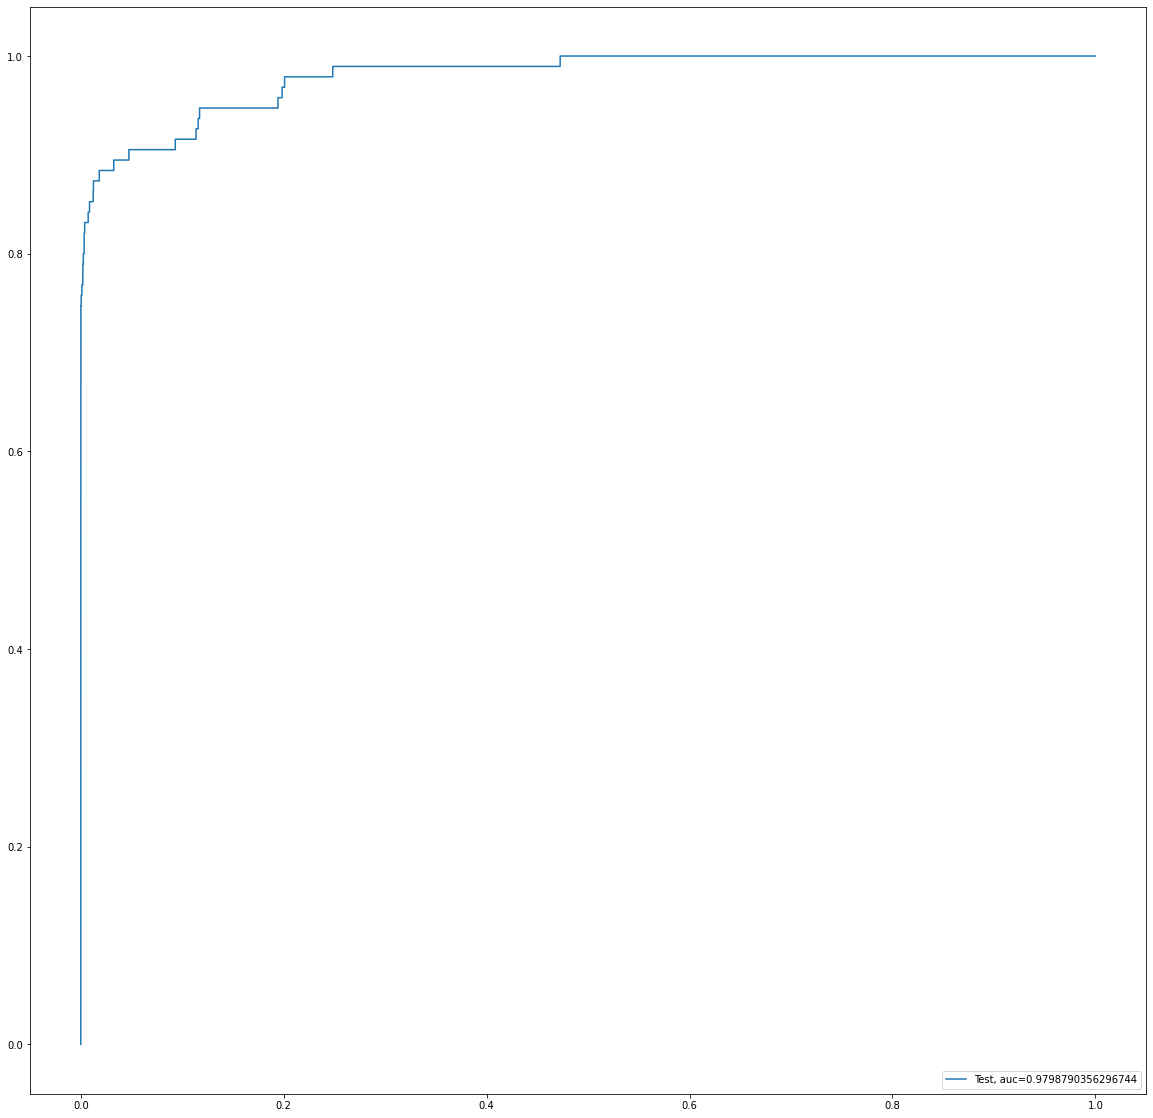

Time Taken by Model: --- 125.16592907905579 seconds ---
--------------------------------------------------------------------------------


In [65]:
# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [66]:
df_Results

,Data Imbalance Handling Method,Model,Accuracy,ROC Value,Threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999048,0.980998,0.002000
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998978,0.979940,0.005365
2,Power Transformer,Tree Model with gini criteria,0.998855,0.871364,1.000000
3,Power Transformer,Tree Model with entropy criteria,0.999189,0.902443,1.000000
4,Power Transformer,Random Forest,0.999542,0.967642,0.010000
5,Power Transformer,XGBoost,0.999559,0.969534,0.002105
6,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998819,0.982762,0.001524
7,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998890,0.935477,0.012036
8,StratifiedKFold Cross Validation,Tree Model with gini criteria,0.998819,0.810253,1.000000
9,StratifiedKFold Cross Validation,Tree Model with entropy criteria,0.999189,0.826201,1.000000


## Hyperparameter tuning for final model to handle class imbalance

In [67]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.996422592298881
XGboost roc_value: 0.9835013703720908
XGBoost threshold: 0.2285405397415161


In [68]:
# Tune XGBoost Model for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([210.72028341, 209.2780076 , 207.14355712, 348.05109973,
         344.58927951, 341.23660536, 474.53318419, 466.20206189,
         462.76816673, 581.16217542, 557.82755117, 472.75888896]),
  'std_fit_time': array([ 3.14793616,  2.60612655,  1.95609312,  2.0331291 ,  2.8230911 ,
          3.26668351,  3.8345823 ,  6.11143745,  8.57408611,  5.31844329,
          8.78207188, 71.16968071]),
  'mean_score_time': array([0.73075337, 1.11062093, 0.75045137, 1.0480031 , 0.99695435,
         1.02515192, 1.23677335, 1.18481297, 1.29224811, 1.32550359,
         1.32871118, 0.8614553 ]),
  'std_score_time': array([0.03902189, 0.29740795, 0.01433943, 0.08138316, 0.08298201,
         0.07972376, 0.0798055 , 0.07013699, 0.2936342 , 0.09922776,
         0.04975699, 0.25767874]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False]

In [69]:
# Tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':range(60, 150, 20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_


({'mean_fit_time': array([307.42679024, 400.18708653, 485.84366164, 604.31372204,
         544.44590263]),
  'std_fit_time': array([ 21.09454225,  24.27385954,  24.675612  ,  32.5249865 ,
         120.93919607]),
  'mean_score_time': array([0.69535923, 0.95338702, 1.23955045, 1.53398299, 1.27087145]),
  'std_score_time': array([0.03280002, 0.06102053, 0.04949064, 0.0768016 , 0.44934105]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'split0_test_score': array([0.99943915, 0.99953155, 0.99954847, 0.99956998, 0.99958977]),
  'split1_test_score': array([0.99999995, 1.        , 1.        , 1.        , 1.        ]),
  'split2_test_score': array([0.99997252, 0.99997505, 0.99997169, 0.99997827, 0.99997701]),
  'split3_test_

In [13]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994360736628778
XGboost roc_value: 0.9881884145491708
XGBoost threshold: 8.653123950352892e-05


In [15]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994360736628778
XGboost roc_value: 0.9881884145491708
XGBoost threshold: 8.653123950352892e-05


# Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 17


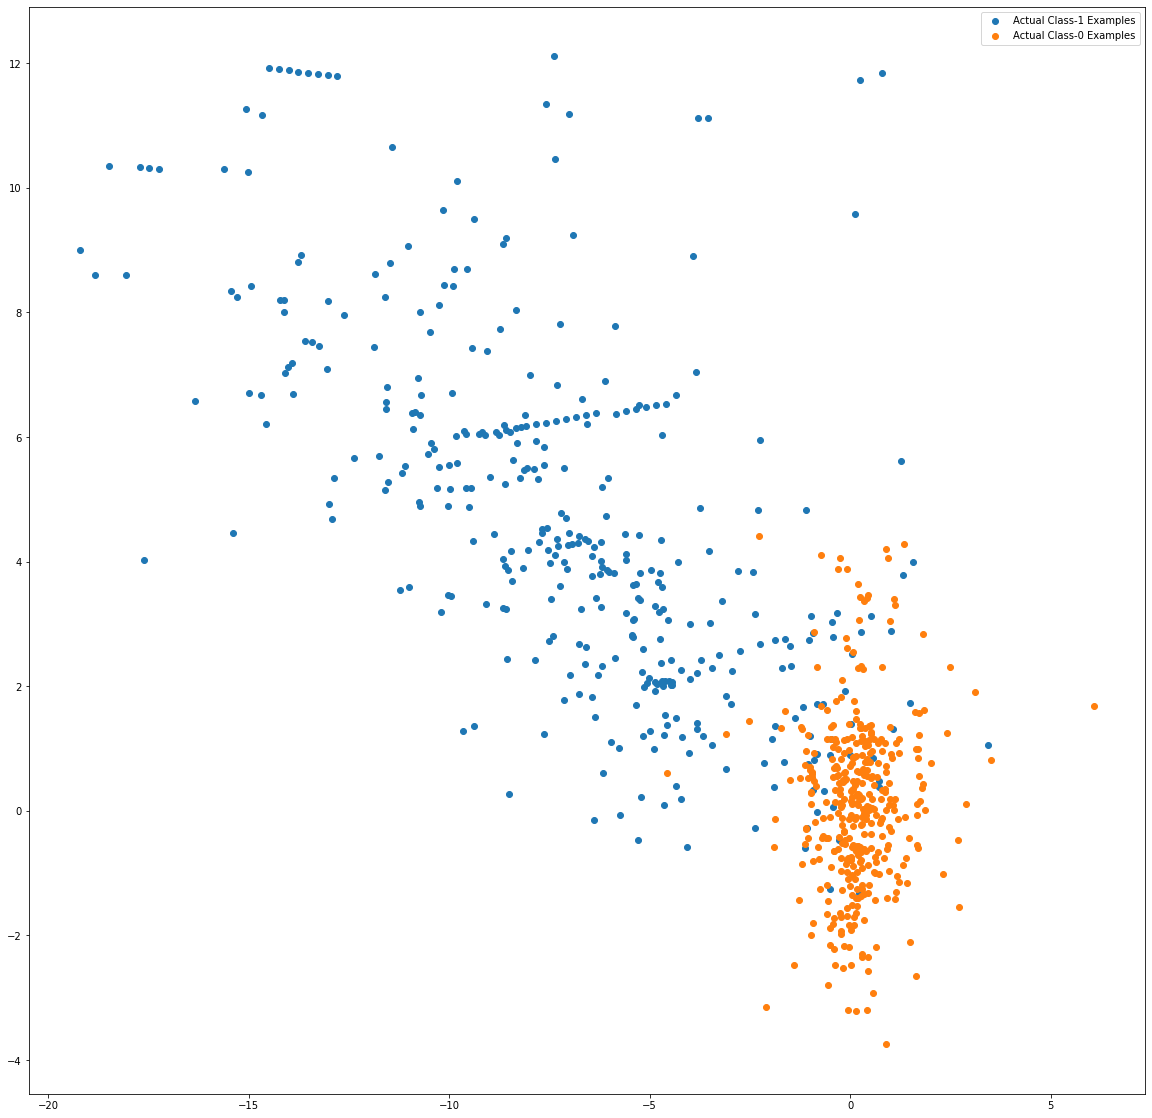

In [16]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-14 and Index-4 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [17]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9881884145491708
XGBoost threshold: 8.653123950352892e-05


# Model Selection
**Overall conclusion after running models on Oversampled data:**

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV

**Model Accuracy:** 0.999383

**XGboost roc_value:** 0.978838

**XGBoost threshold:** 0.001730